<i><h1 style="text-align:center;color:#FFFFF"> Prueba 2 Machine Learning</h1></i>
<i><h3 style="text-align:center;color:#FFFFF">Analizado los crímenes en la Ciudad de Nueva York</h3></i></i>
<i><h3 style="text-align:center;color:#FFFFF">Por : Christian Vergara Retamal </h3></i></i>
<i><h3 style="text-align:center;color:#FFFFF">Felipe Barrios Zúñiga </h3></i></i>

## Preliminares

### Descripción del problema

Se presentan datos públicos del departamento de policía de New York, donde se presenta información sobre interrogaciones y detenciones realizadas por el departamento de policia de NY en la vía pública. Se tienen distintas bases de datos, y se empleará el entrenamiento con datos del 2009 y se hará la validación con datos del 2010.

El problema tiene una forma de aprendizaje supervisado y la naturaleza del vector objetivo es discreta, por lo que nos enfrentamos a un problema de __Clasificación__

Se utilizarán algoritmos como:
* Algoritmos de Clasificación
    + Regresión Logística
    + Naive Bayes
    + Máquinas de Soporte Vectorial

* Algoritmos de Ensambles
    + Random Forest
    + Boosting

### Métricas de desempeño

Dado que trabajaremos con modelos de clasificación utilizaremos Matriz de Confusión, ROC Curve, Precision, Recall y F1.

**Librerías utilizadas para el funcionamiento del notebook**
* numpy versión 1.19.2 : Álgebra lineal y matemáticas
* pandas versión 1.2.2 : Manejo y análisis de estructuras de datos
* matplotlib versión 3.3.4 : Gráficos
* seaborn versión 0.11.1 : Visualización de gráficos
* scikit-learn versión 0.24.1 : Machine Learning
* xgboost versión 1.4.1 : Boosting Classifier

In [1]:
# librerias base
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# librerías a utilizar
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error, median_absolute_error, r2_score, accuracy_score, f1_score

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

# librerías necesarias para esta prueba
import re
from datetime import datetime
import pickle

# fijamos los parámetros de los gráficos
plt.style.use('seaborn-whitegrid')
plt.rcParams['figure.figsize']=(10, 6)

# ignorar warnings
import warnings
warnings.filterwarnings('ignore')

## Ejercicio 1
Debe analizar de forma exploratoria los atributos. Reporte la cantidad de datos perdidos y presente su esquema de recodificación. Tenga presente que lo que observe en el análisis exploratorio debe guiar su proceso de ingeniería de atributos,
por lo que se le recomienda que piense en aspectos de las variables involucradas que puedan afectar el proceso mencionado.

In [2]:
# Importar base de datos de train del 2019 y observamos el contenido del dataset, y se elimina la columna Unnamed: 0
df_train = pd.read_csv('2009_1perc.csv').drop(columns='Unnamed: 0')
df_train.head(5)

year  pct  ser_num  datestop  ...   ycoord dettypcm linecm detailcm
0  2009   41     1779   4032009  ...  0238633       CM      1       20
1  2009  108     5805  10292009  ...  0212157       CM      1       14
2  2009   43     8340  10062009  ...  0240200       CM      1       20
3  2009   77      932   1232009  ...  0183442       CM      1       24
4  2009  110    11224  12132009  ...  0209890       CM      1       20

[5 rows x 111 columns]

In [3]:
print("El dataframe de entrenamiento consta de {} atributos (columnas) y {} registros (filas)".format(df_train.shape[1], df_train.shape[0]))

El dataframe de entrenamiento consta de 111 atributos (columnas) y 5812 registros (filas)


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5812 entries, 0 to 5811
Columns: 111 entries, year to detailcm
dtypes: float64(1), int64(18), object(92)
memory usage: 4.9+ MB


In [5]:
# Verificamos datos perdidos con ISNULL
df_train.isnull().sum()

year        0
pct         0
ser_num     0
datestop    0
timestop    0
           ..
xcoord      0
ycoord      0
dettypcm    0
linecm      0
detailcm    0
Length: 111, dtype: int64

In [6]:
df_train.isnull().sum().sum()

0

In [7]:
# Verificamos datos perdidos con ISNA
df_train.isna().sum()

year        0
pct         0
ser_num     0
datestop    0
timestop    0
           ..
xcoord      0
ycoord      0
dettypcm    0
linecm      0
detailcm    0
Length: 111, dtype: int64

In [8]:
df_train.isna().sum().sum()

0

In [9]:
# Comprobamos que no hay datos para la columna ZIP (por dar un ejemplo)
df_train.zip

0        
1        
2        
3        
4        
       ..
5807     
5808     
5809     
5810     
5811     
Name: zip, Length: 5812, dtype: object

In [10]:
# Reemplazamos todos los datos perdidos con NA de Numpy
df_train.replace(" ",np.nan,inplace=True)

In [11]:
# Comprobamos el resultado
df_train.head(5)

year  pct  ser_num  datestop  ...   ycoord dettypcm linecm detailcm
0  2009   41     1779   4032009  ...  0238633       CM      1       20
1  2009  108     5805  10292009  ...  0212157       CM      1       14
2  2009   43     8340  10062009  ...  0240200       CM      1       20
3  2009   77      932   1232009  ...  0183442       CM      1       24
4  2009  110    11224  12132009  ...  0209890       CM      1       20

[5 rows x 111 columns]

In [12]:
df_train.isna().sum()

year          0
pct           0
ser_num       0
datestop      0
timestop      0
           ... 
xcoord      168
ycoord      168
dettypcm      0
linecm        0
detailcm      0
Length: 111, dtype: int64

In [13]:
# Comprobamos que ISNA y ISNULL dan el mismo resultado (misma cantidad de datos perdidos en total)
print(df_train.isna().sum().sum())
df_train.isna().sum().sum() == df_train.isnull().sum().sum()

77026


True

In [14]:
perdidos = df_train.isna().sum()
perdidos

year          0
pct           0
ser_num       0
datestop      0
timestop      0
           ... 
xcoord      168
ycoord      168
dettypcm      0
linecm        0
detailcm      0
Length: 111, dtype: int64

In [15]:
# Encontramos las columnas con datos perdidos y su respectivo porcentaje
perdidos_2 = round(perdidos[perdidos != 0].sort_values(ascending = False)/len(df_train)*100,1)
perdidos_2

zip         100.0
state       100.0
aptnum      100.0
premtype    100.0
rescode     100.0
othfeatr    100.0
officrid     98.5
arstoffn     94.0
sumoffen     93.9
post         90.6
offverb      78.4
offshld      72.4
beat         62.3
addrnum      56.8
stname       55.5
premname     10.2
trhsloc       3.5
xcoord        2.9
ycoord        2.9
sector        2.0
stinter       0.7
crossst       0.7
dtype: float64

In [16]:
# Considerar columnas que tengan más de 50% de datos perdidos para su análisis y posterior eliminación
perdidos_sacar = list(perdidos_2[perdidos_2 > 50.0].index)
print(len(perdidos_sacar))
sorted(perdidos_sacar)

15


['addrnum',
 'aptnum',
 'arstoffn',
 'beat',
 'officrid',
 'offshld',
 'offverb',
 'othfeatr',
 'post',
 'premtype',
 'rescode',
 'state',
 'stname',
 'sumoffen',
 'zip']

__COMENTARIO__

<div class = "pull-left" style="color:blue"> 
    
Se determina que las 15 variables 'addrnum', 'aptnum', 'arstoffn', 'beat', 'officrid', 'offshld', 'offverb', 'othfeatr', 'post','premtype', 'rescode', 'state', 'stname', 'sumoffen' y 'zip' se eliminan del análisis porque más de la mitad de sus datos son datos perdidos.
    
Además, dentro de estos atributos, los que poseen menor cantidad de datos perdidos son stname LOCATION OF STOP STREET NAME, addrnum LOCATION OF STOP ADDRESS NUMBER y beat LOCATION OF STOP BEAT, siendo atributos de localización, los cuales no deberían ser considerados ya que es un DATASET de NYC local.

In [17]:
# Se crea un nuevo objeto sin las columnas señaladas
df_train_limpio = df_train.drop(columns = perdidos_sacar)

In [18]:
df_train_limpio.shape

(5812, 96)

In [19]:
# Se eliminan los datos perdidos
df_train_limpio = df_train_limpio.dropna()

In [20]:
df_train_limpio.shape

(4841, 96)

In [21]:
# Comporbar porcentaje de eliminación
resta = df_train.shape[0] - df_train_limpio.shape[0]
print(resta)
porcentaje_resta = resta * 100 / df_train.shape[0]
round(porcentaje_resta,1)

971


16.7

__COMENTARIO__

<div class = "pull-left" style="color:blue"> 
    
Se considera que el 16,7% de registros eliminados, correspondiente a 971, es un porcentaje alto considerando los niveles de registros  v/s atributos. Se analizará si es preferible eliminar el atributo que continuaba en la lista "premname LOCATION OF STOP PREMISE NAME" de datos perdidos, con 10,2% de ellos.

In [22]:
df_train_limpio_2 = df_train.drop(columns = perdidos_sacar)
df_train_limpio_2 = df_train_limpio_2.drop(columns="premname")
df_train_limpio_2.shape

(5812, 95)

In [23]:
# Se eliminan los datos perdidos
df_train_limpio_2 = df_train_limpio_2.dropna()
df_train_limpio_2.shape

(5393, 95)

In [24]:
# Comporbar nuevo porcentaje de eliminación
resta = df_train.shape[0] - df_train_limpio_2.shape[0]
print(resta)
porcentaje_resta = resta * 100 / df_train.shape[0]
round(porcentaje_resta,1)

419


7.2

__COMENTARIO__

<div class = "pull-left" style="color:blue"> 
    
El porcentaje de eliminación queda de 7,2% de 419 registros eliminados, por lo tanto nos quedamos con este DATASET con 95 atributos y 5393 registros.

N    0.94
Y    0.06
Name: arstmade, dtype: float64


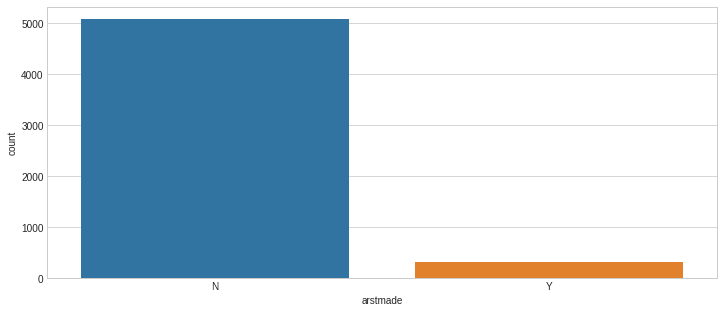

In [25]:
# Se analiza el vector objetivo arstmade
plt.figure(figsize=(12,5))
print(round(df_train_limpio_2.arstmade.value_counts("%"),2))
sns.countplot(df_train_limpio_2.arstmade);

__COMENTARIO__

<div class = "pull-left" style="color:blue"> 

Vemos que el vector objetivo arstmade "WAS AN ARREST MADE ?" está bastante desbalanceado, con un 94% indicando que el registro NO fue un arresto

In [26]:
# Por temas de eficiencia, se descartarán las variables categóricas con mas de 10 valores únicos
# Primero se creará un dataset con los datos necesarios
nombre,valores_unicos,tipo = [],[],[]
for i in df_train_limpio_2.drop(columns="arstmade").columns:
    nombre.append(i)
    valores_unicos.append(len(df_train_limpio_2[i].unique()))
    tipo.append(df_train_limpio_2[i].dtype)
user_list = list(zip(nombre, valores_unicos,tipo))
data = pd.DataFrame(user_list,columns=['nombre','n valores unicos', 'tipo'])
data

nombre  n valores unicos    tipo
0       year                 1   int64
1        pct                76   int64
2    ser_num              4397   int64
3   datestop               365   int64
4   timestop               966   int64
..       ...               ...     ...
89    xcoord              4169  object
90    ycoord              4248  object
91  dettypcm                 1  object
92    linecm                 1   int64
93  detailcm                48   int64

[94 rows x 3 columns]

In [27]:
# Identificar las variables categóricas con mas de 10 valores únicos
data2 = data[np.logical_and(data["tipo"]=="object",data["n valores unicos"] > 10)]
a = list(data2.nombre)
print(a)
data2

['crimsusp', 'haircolr', 'stinter', 'crossst', 'sector', 'xcoord', 'ycoord']


nombre  n valores unicos    tipo
9   crimsusp               370  object
80  haircolr                11  object
84   stinter              1488  object
85   crossst              1587  object
88    sector                18  object
89    xcoord              4169  object
90    ycoord              4248  object

In [28]:
# Descartar las variables categóricas con mas de 10 valores únicos (SOLO PARA PODER GRAFICARLAS MEJOR)
data3 = df_train_limpio_2.drop(columns=a)
data3

year  pct  ser_num  datestop  ...  addrpct dettypcm linecm detailcm
0     2009   41     1779   4032009  ...       41       CM      1       20
1     2009  108     5805  10292009  ...      108       CM      1       14
2     2009   43     8340  10062009  ...       43       CM      1       20
3     2009   77      932   1232009  ...       77       CM      1       24
4     2009  110    11224  12132009  ...      110       CM      1       20
...    ...  ...      ...       ...  ...      ...      ...    ...      ...
5807  2009   52     3719   3282009  ...       52       CM      1        9
5808  2009   79    15751   9292009  ...       79       CM      1       20
5809  2009   69     3024   6262009  ...       69       CM      1       85
5810  2009   76     1303   3102009  ...       76       CM      1       27
5811  2009   10     1018   5142009  ...       10       CM      1       24

[5393 rows x 88 columns]

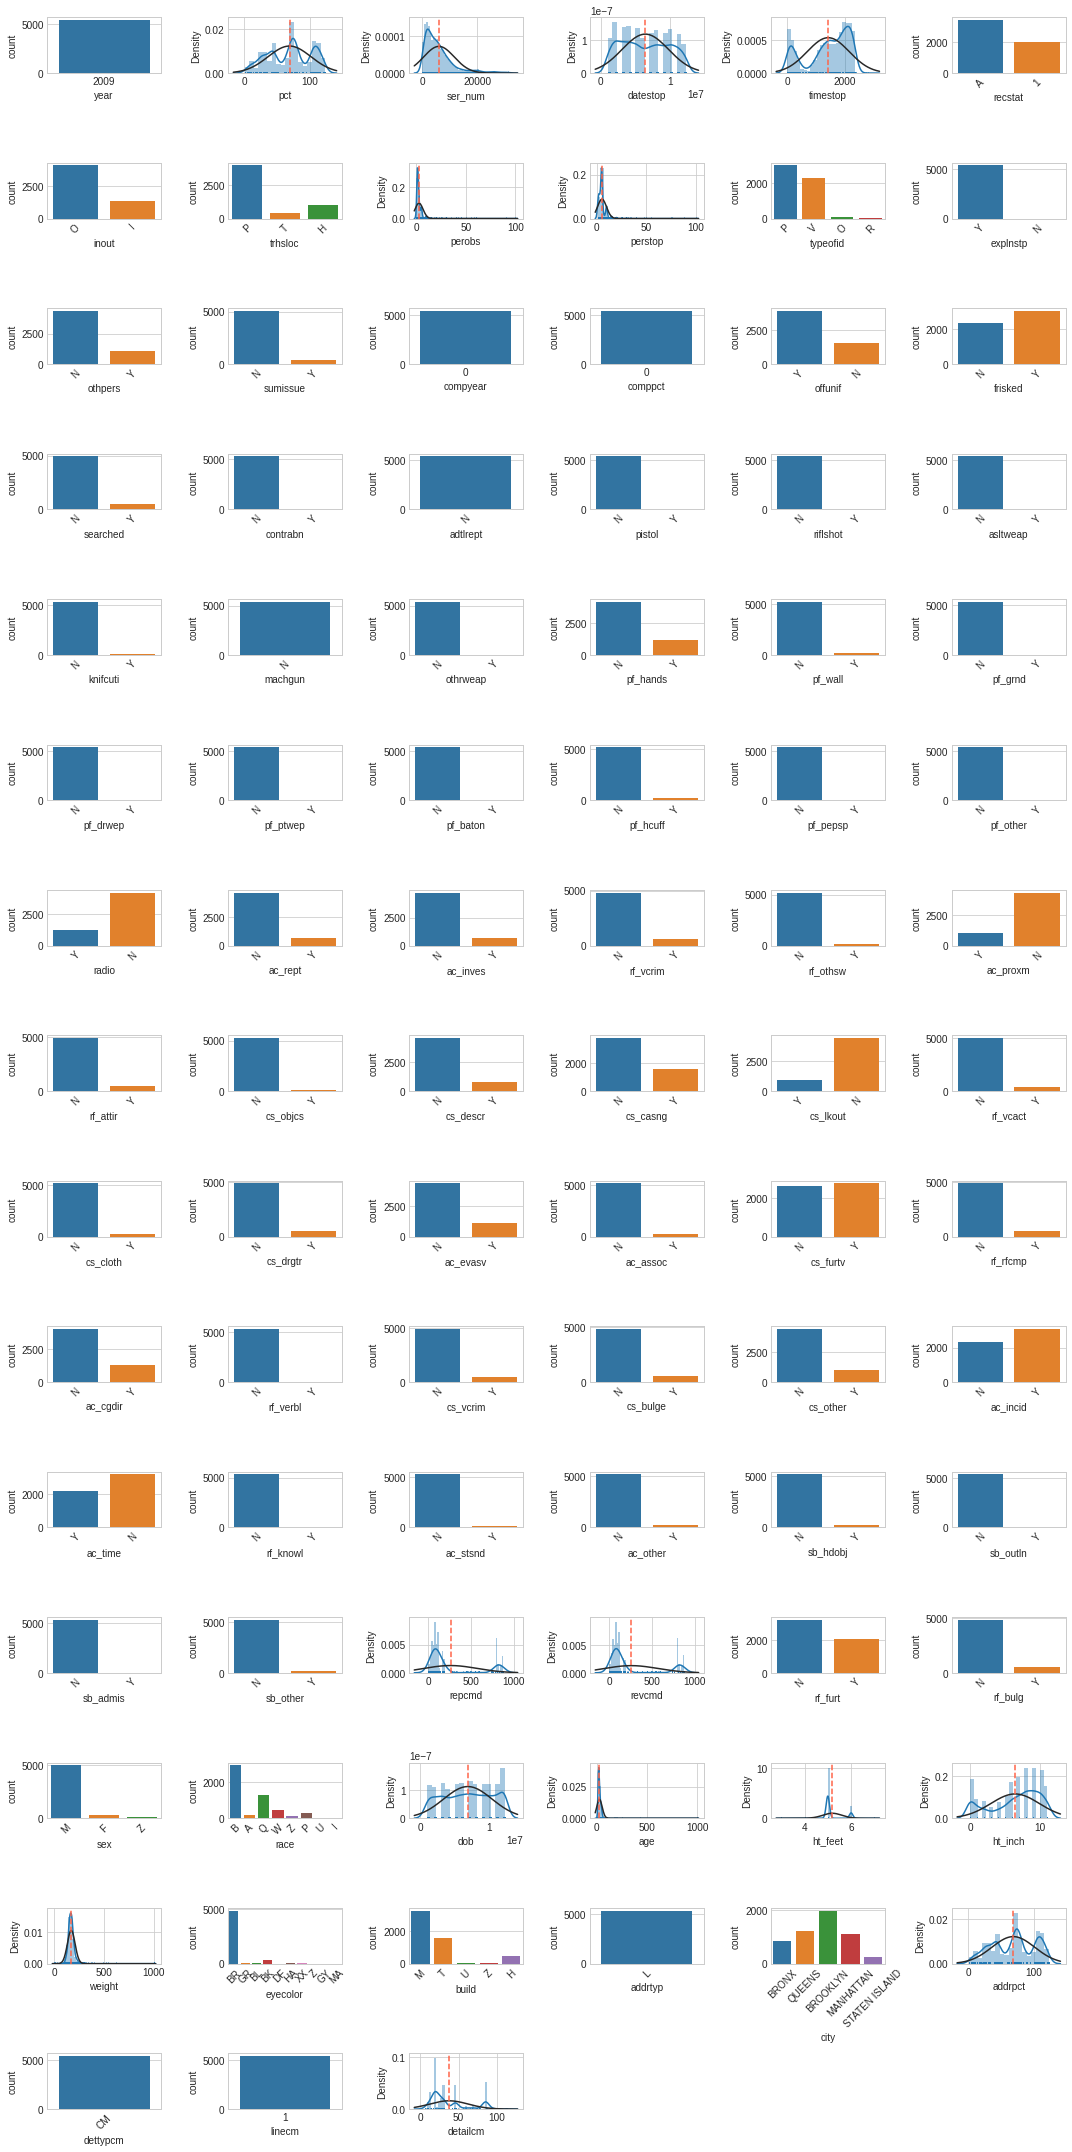

In [29]:
# Visualización de todas las variables sin las variables categóricas con mas de 10 valores únicos
rows = 15; cols = round(data3.drop(columns="arstmade").shape[1]/rows)
plt.figure(figsize=(15,30))
for i,j in enumerate(data3.drop(columns="arstmade").columns):
    plt.subplot(rows, cols, i+1)
    if data3[j].dtype == 'object':
        sns.countplot(data3[j])
        plt.xticks(rotation=45)
    else:
        if len(data3[j].value_counts())>2:
            sns.distplot(data3[j],rug=True,fit=stats.norm)    
            plt.axvline(data3[j].mean(), color = "tomato", linestyle = '--')
        else:
            sns.countplot(data3[j])
    plt.tight_layout()

In [30]:
# Identificar las variables con solo 1 valor único
data4 = data[data["n valores unicos"]==1]
b = list(data4.nombre)
print(b)
print(len(b))
data4

['year', 'compyear', 'comppct', 'adtlrept', 'machgun', 'addrtyp', 'dettypcm', 'linecm']
8


nombre  n valores unicos    tipo
0       year                 1   int64
15  compyear                 1   int64
16   comppct                 1   int64
21  adtlrept                 1  object
26   machgun                 1  object
83   addrtyp                 1  object
91  dettypcm                 1  object
92    linecm                 1   int64

In [31]:
# Descartar las variables con solo 1 valor único
df_train_limpio_3 = df_train_limpio_2.drop(columns=b)
print(df_train_limpio_3.shape)
df_train_limpio_3.head()

(5393, 87)


pct  ser_num  datestop  timestop  ... sector   xcoord   ycoord  detailcm
0   41     1779   4032009       130  ...      G  1013067  0238633        20
1  108     5805  10292009      1050  ...      J  1012043  0212157        14
2   43     8340  10062009      1450  ...      E  1017599  0240200        20
3   77      932   1232009      1843  ...      J  1002625  0183442        24
4  110    11224  12132009      1655  ...      H  1024535  0209890        20

[5 rows x 87 columns]

__COMENTARIO__

<div class = "pull-left" style="color:blue"> 
    
Nos quedamnos con el DATASET de entrenamiento con 87 atributos y 5393 registros (cabe destacar que NO se eliminaron las variables con más de 10 valores únicos, solo se eliminaron las variables con solo 1 valor único)

In [32]:
# Observación y análisis de las variables categóricas
df_train_limpio_3.describe(include="object")

recstat inout trhsloc crimsusp  ...      city sector   xcoord   ycoord
count     5393  5393    5393     5393  ...      5393   5393     5393     5393
unique       2     2       3      370  ...         5     18     4169     4248
top          A     O       P      CPW  ...  BROOKLYN      A  1001575  0232339
freq      3385  4046    3968      759  ...      1967    553       24       24

[4 rows x 72 columns]

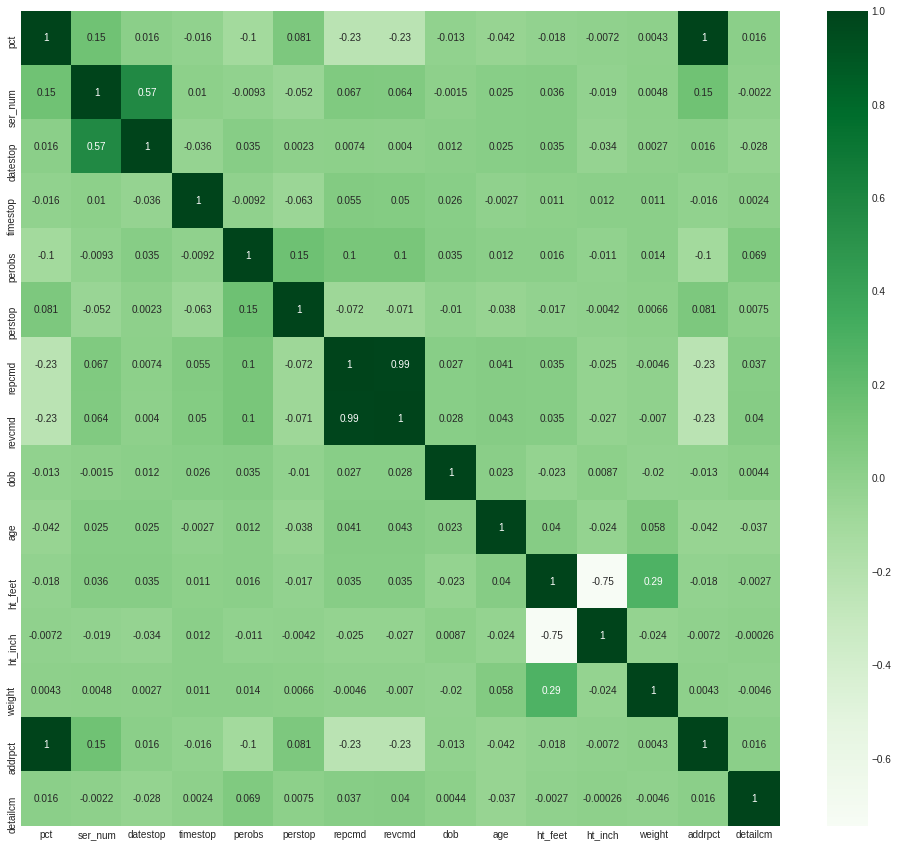

In [33]:
# Se revisa la correlación entre las variables
plt.figure(figsize=(17,15))
sns.heatmap(df_train_limpio_3.corr(), cmap='Greens', annot=True);

In [34]:
# Se excluyen las variables con mayor correlación
df_train_limpio_4 = df_train_limpio_3.drop(columns=["ht_inch","revcmd"])
df_train_limpio_4.shape

(5393, 85)

__COMENTARIO__

<div class = "pull-left" style="color:blue"> 
    
Las variables con mayor correlación son: "revcmd REVIEWING OFFICER'S COMMAND (1 TO 999)" junto con "repcmd REPORTING OFFICER'S COMMAND (1 TO 999)"; y, "ht_feet SUSPECT'S HEIGHT (FEET)" junto con "ht_inch SUSPECT'S HEIGHT (INCHES)" porque representan lo mismo pero en una diferente escala. En este caso se excluyen solo las variables __revcmd__ y __ht_inch__
    
Finalemnte nos quedamnos con el DATASET de entrenamiento con 85 atributos y 5393 registros.

<i><h3 style="text-align:center;color:#FFFFF">Sección Análoga para muestra de validación</h3></i></i>

In [35]:
# importar base de datos de test
df_test = pd.read_csv('2010_1perc.csv').drop(columns='Unnamed: 0')
print(df_test.shape)
df_test.sample(5)

(6013, 111)


year  pct  ser_num  datestop  ...  ycoord dettypcm linecm detailcm
1893  2010   71     2546   4182010  ...  181707       CM      1       14
1422  2010   78     2875  11152010  ...  183126       CM      1       85
1135  2010   33     2849   7162010  ...  244309       CM      1       24
3656  2010   73      237   1072010  ...               CM      1       31
5431  2010   23     1629   1032010  ...               CM      1       20

[5 rows x 111 columns]

In [36]:
print("El dataframe de entrenamiento consta de {} atributos (columnas) y {} registros (filas)".format(df_test.shape[1], df_test.shape[0]))

El dataframe de entrenamiento consta de 111 atributos (columnas) y 6013 registros (filas)


In [37]:
print(df_train.shape[1] == df_test.shape[1])
list(df_train.columns) == list(df_test.columns)

True


True

__COMENTARIO__

<div class = "pull-left" style="color:blue"> 
    
Se comprueba que ambos dataset (de entrenamiento y validación) tienen la misma cantidad de atributos, y los mismos atributos.

In [38]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6013 entries, 0 to 6012
Columns: 111 entries, year to detailcm
dtypes: int64(16), object(95)
memory usage: 5.1+ MB


In [39]:
# Verificamos datos perdidos con ISNULL
df_test.isnull().sum()

year        0
pct         0
ser_num     0
datestop    0
timestop    0
           ..
xcoord      0
ycoord      0
dettypcm    0
linecm      0
detailcm    0
Length: 111, dtype: int64

In [40]:
# Comprobamos que no hay datos para la columna ZIP (por dar un ejemplo)
df_test.zip

0        
1        
2        
3        
4        
       ..
6008     
6009     
6010     
6011     
6012     
Name: zip, Length: 6013, dtype: object

In [41]:
# Reemplazamos todos los datos perdidos con NA de Numpy
df_test.replace(" ",np.nan,inplace=True)

In [42]:
# Comprobamos el resultado
df_test.head(5)

year  pct  ser_num  datestop  ...  ycoord dettypcm linecm detailcm
0  2010    6      487   1192010  ...  208767       CM      1       85
1  2010   42     7138   9042010  ...  241737       CM      1       45
2  2010   33     2628   6302010  ...  245710       CM      1       85
3  2010  108     6384  11172010  ...  212240       CM      1       28
4  2010   14     2295   3072010  ...  212439       CM      1       20

[5 rows x 111 columns]

In [43]:
# Comprobamos que ISNA y ISNULL dan el mismo resultado (misma cantidad de datos perdidos en total)
print(df_test.isna().sum().sum())
df_test.isna().sum().sum() == df_test.isnull().sum().sum()

79930


True

In [44]:
perdidos_test = df_test.isna().sum()
perdidos_test

year          0
pct           0
ser_num       0
datestop      0
timestop      0
           ... 
xcoord      249
ycoord      249
dettypcm      1
linecm        1
detailcm      1
Length: 111, dtype: int64

In [45]:
# Encontramos las columnas con datos perdidos y su respectivo porcentaje
perdidos_test_2 = round(perdidos_test[perdidos_test != 0].sort_values(ascending = False)/len(df_test)*100,2)
perdidos_test_2

state       100.00
zip         100.00
premtype    100.00
aptnum      100.00
othfeatr    100.00
rescode     100.00
officrid     98.74
arstoffn     93.36
sumoffen     92.58
post         89.52
offverb      77.95
offshld      72.68
beat         63.56
addrnum      59.22
stname       57.68
premname     10.39
xcoord        4.14
ycoord        4.14
sector        2.88
stinter       1.18
crossst       1.16
addrtyp       0.02
linecm        0.02
city          0.02
addrpct       0.02
dettypcm      0.02
detailcm      0.02
dtype: float64

In [46]:
# Considerar columnas que tengan más de 50% de datos perdidos para su análisis y posterior eliminación
perdidos_sacar_test = list(perdidos_test_2[perdidos_test_2 > 50.0].index)
print(len(perdidos_sacar_test))
sorted(perdidos_sacar_test)

15


['addrnum',
 'aptnum',
 'arstoffn',
 'beat',
 'officrid',
 'offshld',
 'offverb',
 'othfeatr',
 'post',
 'premtype',
 'rescode',
 'state',
 'stname',
 'sumoffen',
 'zip']

In [47]:
# Comprobar que las listas de eliminación sean las mismas para Entrenamiento y Validación
perdidos_sacar_test == perdidos_sacar

False

In [48]:
# Se crea un nuevo objeto sin las columnas señaladas
df_test_limpio = df_test.drop(columns = perdidos_sacar_test)

In [49]:
df_test_limpio.shape

(6013, 96)

In [50]:
# Se eliminan los datos perdidos
df_test_limpio = df_test_limpio.dropna()

In [51]:
df_test_limpio.shape

(5121, 96)

In [52]:
# Comporbar porcentaje de eliminación
resta = df_test.shape[0] - df_test_limpio.shape[0]
print(resta)
porcentaje_resta = resta * 100 / df_test.shape[0]
round(porcentaje_resta,1)

892


14.8

__COMENTARIO__

<div class = "pull-left" style="color:blue"> 
    
De forma análoga se considera que el 14,8% de registros eliminados, correspondiente a 892, es un porcentaje alto considerando los niveles de registros  v/s atributos. Se analizará si es preferible eliminar el atributo que continuaba en la lista "premname LOCATION OF STOP PREMISE NAME" de datos perdidos, con 10,39% de ellos.

In [53]:
df_test_limpio_2 = df_test.drop(columns = perdidos_sacar_test)
df_test_limpio_2 = df_test_limpio_2.drop(columns="premname")
df_test_limpio_2.shape

(6013, 95)

In [54]:
# Se eliminan los datos perdidos
df_test_limpio_2 = df_test_limpio_2.dropna()
df_test_limpio_2.shape

(5697, 95)

In [55]:
# Comporbar nuevo porcentaje de eliminación
resta = df_test.shape[0] - df_test_limpio_2.shape[0]
print(resta)
porcentaje_resta = resta * 100 / df_test.shape[0]
round(porcentaje_resta,1)

316


5.3

__COMENTARIO__

<div class = "pull-left" style="color:blue"> 
    
Así mismo, el porcentaje de eliminación queda de 5,3% de 316 registros eliminados, por lo tanto nos quedamos con este DATASET con 95 atributos y 5697 registros.

N    0.93
Y    0.07
Name: arstmade, dtype: float64


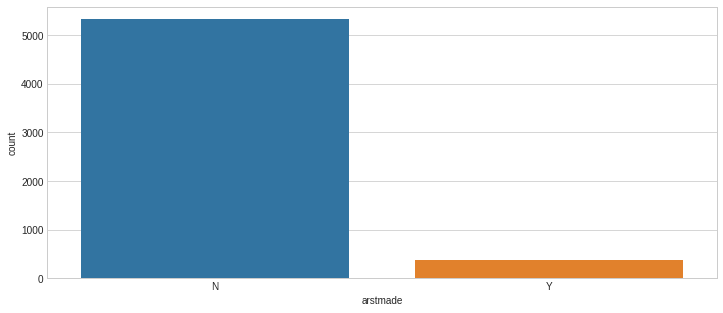

In [56]:
# Se analiza el vector objetivo arstmade
plt.figure(figsize=(12,5))
print(round(df_test_limpio_2.arstmade.value_counts("%"),2))
sns.countplot(df_test_limpio_2.arstmade);

__COMENTARIO__

<div class = "pull-left" style="color:blue"> 

Vemos que el vector objetivo arstmade "WAS AN ARREST MADE ?" está bastante desbalanceado, con un 93% indicando que el registro NO fue un arresto

In [57]:
# Por temas de eficiencia, se descartarán las variables categóricas con mas de 10 valores únicos
# Primero se creará un dataset con los datos necesarios
nombre,valores_unicos,tipo = [],[],[]
for i in df_test_limpio_2.drop(columns="arstmade").columns:
    nombre.append(i)
    valores_unicos.append(len(df_test_limpio_2[i].unique()))
    tipo.append(df_test_limpio_2[i].dtype)
user_list = list(zip(nombre, valores_unicos,tipo))
data_test = pd.DataFrame(user_list,columns=['nombre','n valores unicos', 'tipo'])
data_test

nombre  n valores unicos    tipo
0       year                 1   int64
1        pct                76   int64
2    ser_num              4621   int64
3   datestop               365   int64
4   timestop              1005   int64
..       ...               ...     ...
89    xcoord              4514  object
90    ycoord              4579  object
91  dettypcm                 1  object
92    linecm                 1  object
93  detailcm                79  object

[94 rows x 3 columns]

In [58]:
# Identificar las variables categóricas con mas de 10 valores únicos
data2_test = data_test[np.logical_and(data_test["tipo"]=="object",data_test["n valores unicos"] > 10)]
a = list(data2_test.nombre)
print(a)
data2_test

['crimsusp', 'eyecolor', 'stinter', 'crossst', 'addrpct', 'sector', 'xcoord', 'ycoord', 'detailcm']


nombre  n valores unicos    tipo
9   crimsusp               387  object
81  eyecolor                11  object
84   stinter              1573  object
85   crossst              1706  object
87   addrpct                76  object
88    sector                18  object
89    xcoord              4514  object
90    ycoord              4579  object
93  detailcm                79  object

In [59]:
data2

nombre  n valores unicos    tipo
9   crimsusp               370  object
80  haircolr                11  object
84   stinter              1488  object
85   crossst              1587  object
88    sector                18  object
89    xcoord              4169  object
90    ycoord              4248  object

In [60]:
print(len(list(data2_test.nombre)) == len(list(data2.nombre)))
sorted(list(data2_test.nombre)) == sorted(list(data2.nombre))

False


False

__COMENTARIO__

<div class = "pull-left" style="color:blue"> 
    
Se comprueba que ambas listas de variables categóricas son distinas, pero están son solo para hacer el análisis exploratorio de datos.

In [61]:
# Descartar las variables categóricas con mas de 10 valores únicos (SOLO PARA PODER GRAFICARLAS MEJOR)
data3_test = df_test_limpio_2.drop(columns=a)
data3_test

year  pct  ser_num  datestop  ...  addrtyp       city dettypcm linecm
0     2010    6      487   1192010  ...        L  MANHATTAN       CM      1
1     2010   42     7138   9042010  ...        L      BRONX       CM      1
2     2010   33     2628   6302010  ...        L  MANHATTAN       CM      1
3     2010  108     6384  11172010  ...        L     QUEENS       CM      1
4     2010   14     2295   3072010  ...        L  MANHATTAN       CM      1
...    ...  ...      ...       ...  ...      ...        ...      ...    ...
6008  2010   60     7062   9262010  ...        L   BROOKLYN       CM      1
6009  2010   75    15797   7302010  ...        L   BROOKLYN       CM      1
6010  2010  123      830   4302010  ...        L  STATEN IS       CM      1
6011  2010  115    13122  11232010  ...        L     QUEENS       CM      1
6012  2010   14      219   1062010  ...        L  MANHATTAN       CM      1

[5697 rows x 86 columns]

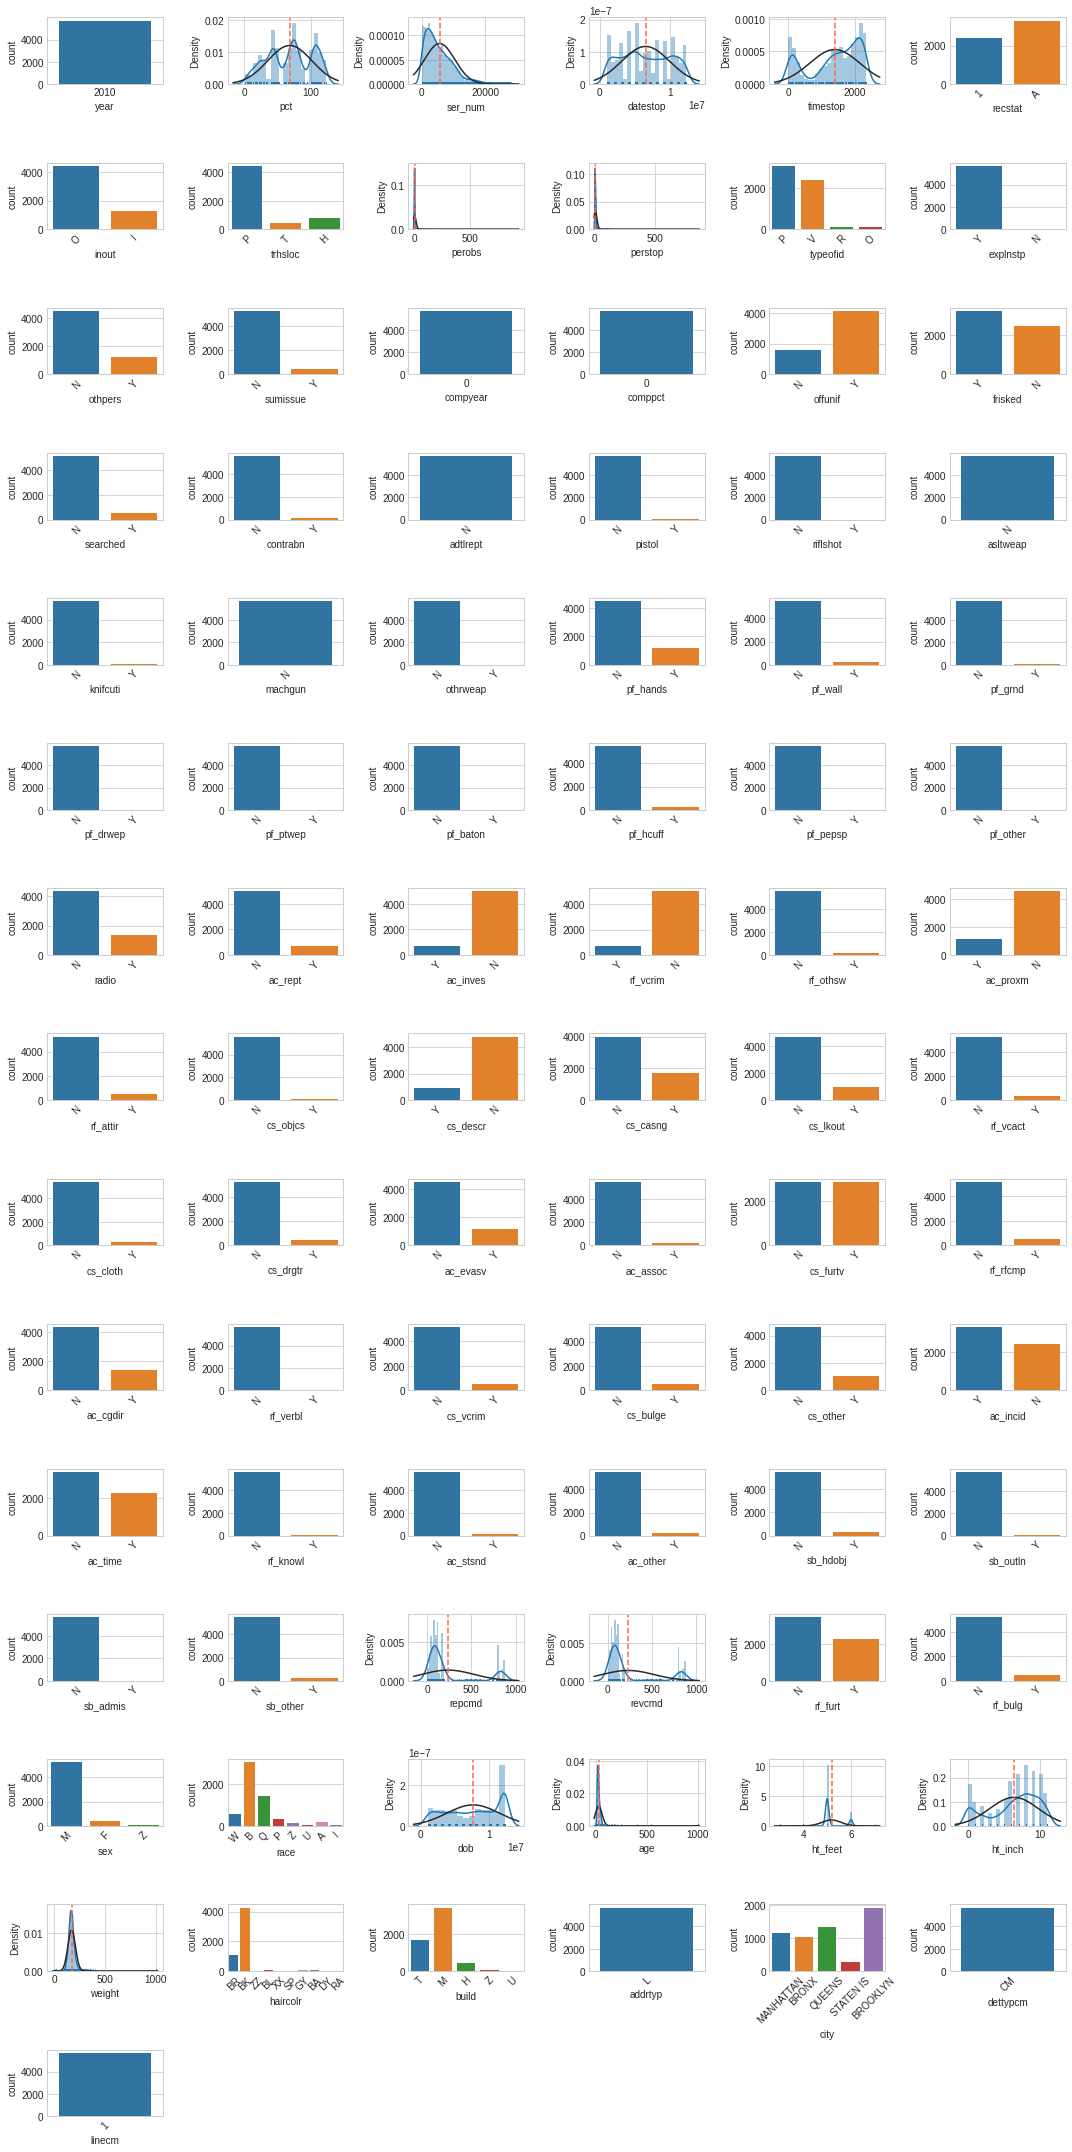

In [62]:
# Visualización de todas las variables sin las variables categóricas con mas de 10 valores únicos
rows = 15; cols = round(data3_test.drop(columns="arstmade").shape[1]/rows)
plt.figure(figsize=(15,30))
for i,j in enumerate(data3_test.drop(columns="arstmade").columns):
    plt.subplot(rows, cols, i+1)
    if data3_test[j].dtype == 'object':
        sns.countplot(data3_test[j])
        plt.xticks(rotation=45)
    else:
        if len(data3_test[j].value_counts())>2:
            sns.distplot(data3_test[j],rug=True,fit=stats.norm)    
            plt.axvline(data3_test[j].mean(), color = "tomato", linestyle = '--')
        else:
            sns.countplot(data3_test[j])
    plt.tight_layout()

In [63]:
# Identificar las variables con solo 1 valor único
data4_test = data_test[data_test["n valores unicos"]==1]
b = list(data4_test.nombre)
print(b)
print(len(b))
data4_test

['year', 'compyear', 'comppct', 'adtlrept', 'asltweap', 'machgun', 'addrtyp', 'dettypcm', 'linecm']
9


nombre  n valores unicos    tipo
0       year                 1   int64
15  compyear                 1   int64
16   comppct                 1   int64
21  adtlrept                 1  object
24  asltweap                 1  object
26   machgun                 1  object
83   addrtyp                 1  object
91  dettypcm                 1  object
92    linecm                 1  object

In [64]:
print(len(list(data4_test.nombre)) == len(list(data4.nombre)))
sorted(list(data4_test.nombre)) == sorted(list(data4.nombre))

False


False

__COMENTARIO__

<div class = "pull-left" style="color:blue"> 
    
Se comprueba que ambas listas de variables con solo 1 valor único son distintas.--

<i><h3 style="text-align:center;color:#FFFFF">Fin de Sección Análoga para muestra de validación</h3></i></i>

In [65]:
# Se comprueba que el tipo de los datos de la columna "detailcm" es de tipo object
print(df_test_limpio_2.detailcm.dtype)
df_test_limpio_2.detailcm

object


0        85
1        45
2        85
3        28
4        20
       ... 
6008     20
6009     85
6010     46
6011     85
6012     23
Name: detailcm, Length: 5697, dtype: object

In [66]:
# Se comprueba que la columna "detailcm" hay espacios en blanco en los datos numéricos
df_test_limpio_2.detailcm.str.contains(" ").value_counts()

False    4920
True      777
Name: detailcm, dtype: int64

In [67]:
df_test_limpio_2.detailcm.value_counts()

20     1320
85      826
46      545
31      482
14      463
       ... 
86        1
 96       1
 74       1
113       1
 78       1
Name: detailcm, Length: 79, dtype: int64

In [68]:
# Por otro lado, en el conjunto de entrenamiento es de tipo int64
df_train_limpio_2.detailcm.dtype

dtype('int64')

In [69]:
# Se crea objeto auxiliar "var" de la columna detailcm y Se eliminan los espacios en blanco
var = df_test_limpio_2.detailcm
var = var.apply(lambda x : x.replace(" ",""))
var

0       85
1       45
2       85
3       28
4       20
        ..
6008    20
6009    85
6010    46
6011    85
6012    23
Name: detailcm, Length: 5697, dtype: object

In [70]:
# Se comprueba que desaparecieron los espacios en blanco
var.str.contains(" ").value_counts()

False    5697
Name: detailcm, dtype: int64

In [71]:
# Sigue siendo tipo object
var.dtype

dtype('O')

In [72]:
# Se fuerza el cambio de tipo de variable y se sobreescrribe
var = var.astype("int64")
var.dtype

dtype('int64')

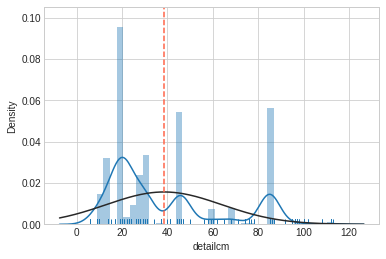

In [73]:
# Comprobar si se puede hacer gráfico numérico
if var.dtype == 'object':
    sns.countplot(var)
    plt.xticks(rotation=45)
else:
    if len(var.value_counts())>2:
        sns.distplot(var,rug=True,fit=stats.norm)    
        plt.axvline(var.mean(), color = "tomato", linestyle = '--')
    else:
        sns.countplot(var)

In [74]:
# Se creará un nuevo dataframe con los tipos de datos de cada columna entre entrenamiento y test
columna, tipo_train, tipo_test, unique_train, unique_test = [],[],[],[],[]
todas_column = list(df_train.columns)
for i in todas_column:
    columna.append(i)
    tipo_train.append(df_train[i].dtype)
    tipo_test.append(df_test[i].dtype)
    unique_train.append(len(df_train[i].unique()))
    unique_test.append(len(df_test[i].unique()))

In [75]:
# Dataframe
user_list = list(zip(columna, tipo_train, tipo_test,unique_train,unique_test))
data_tipo = pd.DataFrame(user_list,columns=['columna','tipo train', 'tipo test', "unicos train","unicos test"])
data_tipo

columna tipo train tipo test  unicos train  unicos test
0        year      int64     int64             1            1
1         pct      int64     int64            76           76
2     ser_num      int64     int64          4655         4805
3    datestop      int64     int64           365          365
4    timestop      int64     int64           990         1021
..        ...        ...       ...           ...          ...
106    xcoord     object    object          4346         4553
107    ycoord     object    object          4430         4619
108  dettypcm     object    object             1            2
109    linecm      int64    object             1            2
110  detailcm      int64    object            48           81

[111 rows x 5 columns]

In [76]:
# Se agrega columna de Validación
data_tipo["Validacion"] = data_tipo["tipo train"] == data_tipo["tipo test"]
data_tipo

columna tipo train tipo test  unicos train  unicos test  Validacion
0        year      int64     int64             1            1        True
1         pct      int64     int64            76           76        True
2     ser_num      int64     int64          4655         4805        True
3    datestop      int64     int64           365          365        True
4    timestop      int64     int64           990         1021        True
..        ...        ...       ...           ...          ...         ...
106    xcoord     object    object          4346         4553        True
107    ycoord     object    object          4430         4619        True
108  dettypcm     object    object             1            2        True
109    linecm      int64    object             1            2       False
110  detailcm      int64    object            48           81       False

[111 rows x 6 columns]

In [77]:
# Se identifican las columnas con distintos tipos de datos entre entrenamiento y test
data_falsos = data_tipo[data_tipo["Validacion"] == False]
data_falsos

columna tipo train tipo test  unicos train  unicos test  Validacion
8      perobs    float64     int64            40           29       False
102   addrpct      int64    object            76           77       False
109    linecm      int64    object             1            2       False
110  detailcm      int64    object            48           81       False

__COMENTARIO__

<div class = "pull-left" style="color:blue"> 
    
Se comprueba que "detailcm" se encuentra en esta tabla, como se analizó anteriormente

<i><h3 style="text-align:center;color:#FFFFF">CONCLUSION</h3></i></i>

__COMENTARIO__

<div class = "pull-left" style="color:blue"> 
    
Con respecto a los resultados anteriores, sobre el las distintas columnas con valores únicos entre los conjuntos de entrenamiento y validación, además las distintas columnas con diferentes tipos de datos entre sus columnas, se decidirá __juntar ambos conjuntos de entrenamiento y validación__ para hacer todo el análisis de nuevo sobre los datos perdidos y las columnas a eliminar si así es necesario, además de hacer un exhaustivo análisis con respecto a los tipos de datos de los atributos. Se ocupará la función "astype" para pasar de object a int64 cuando corresponda.
    
Finalmente se dividirá este dataset con un 0,33% para el nuevo conjunto de validación.

In [78]:
# Recordamos que ambos conjuntos tienen la misma cantidad de variables y en el mismo orden
print(df_train.shape[1] == df_test.shape[1])
list(df_train.columns) == list(df_test.columns)

True


True

In [79]:
# Concatenar ambos dataset
df_concat = pd.concat([df_train,df_test])
print(df_concat.shape)
df_concat.head()

(11825, 111)


year  pct  ser_num  datestop  ...   ycoord dettypcm linecm detailcm
0  2009   41     1779   4032009  ...  0238633       CM      1       20
1  2009  108     5805  10292009  ...  0212157       CM      1       14
2  2009   43     8340  10062009  ...  0240200       CM      1       20
3  2009   77      932   1232009  ...  0183442       CM      1       24
4  2009  110    11224  12132009  ...  0209890       CM      1       20

[5 rows x 111 columns]

__COMENTARIO__

<div class = "pull-left" style="color:blue"> 
    
No es necesario encontrar los datos perdidos porque los dataset ya estaban sobreescritos de esa forma

In [80]:
perdidos_concat = df_concat.isna().sum()
perdidos_concat

year          0
pct           0
ser_num       0
datestop      0
timestop      0
           ... 
xcoord      417
ycoord      417
dettypcm      1
linecm        1
detailcm      1
Length: 111, dtype: int64

In [81]:
# Encontramos las columnas con datos perdidos y su respectivo porcentaje
perdidos_concat_2 = round(perdidos_concat[perdidos_concat != 0].sort_values(ascending = False)/len(df_concat)*100,2)
perdidos_concat_2

state       100.00
zip         100.00
premtype    100.00
aptnum      100.00
othfeatr    100.00
rescode     100.00
officrid     98.64
arstoffn     93.68
sumoffen     93.22
post         90.07
offverb      78.19
offshld      72.52
beat         62.95
addrnum      58.02
stname       56.60
premname     10.28
xcoord        3.53
ycoord        3.53
sector        2.44
trhsloc       1.73
stinter       0.94
crossst       0.93
addrtyp       0.01
linecm        0.01
city          0.01
addrpct       0.01
dettypcm      0.01
detailcm      0.01
dtype: float64

In [82]:
# Considerar columnas que tengan más de 50% de datos perdidos para su análisis y posterior eliminación
perdidos_sacar_concat = list(perdidos_concat_2[perdidos_concat_2 > 50.0].index)
print(len(perdidos_sacar_concat))
sorted(perdidos_sacar_concat)

15


['addrnum',
 'aptnum',
 'arstoffn',
 'beat',
 'officrid',
 'offshld',
 'offverb',
 'othfeatr',
 'post',
 'premtype',
 'rescode',
 'state',
 'stname',
 'sumoffen',
 'zip']

In [83]:
# Comprobar que las listas de eliminación sean las mismas para Entrenamiento y Validación
perdidos_sacar_concat == perdidos_sacar_test

True

__COMENTARIO__

<div class = "pull-left" style="color:blue"> 
    
Se determina que las 15 variables 'addrnum', 'aptnum', 'arstoffn', 'beat', 'officrid', 'offshld', 'offverb', 'othfeatr', 'post','premtype', 'rescode', 'state', 'stname', 'sumoffen' y 'zip' se eliminan del análisis porque más de la mitad de sus datos son datos perdidos.
    
(Las mismas que en los casos anteriores por separado)

In [84]:
# Se crea un nuevo objeto sin las columnas señaladas
df_concat_limpio = df_concat.drop(columns = perdidos_sacar_concat)

In [85]:
df_concat_limpio.shape

(11825, 96)

In [86]:
# Se eliminan los datos perdidos
df_concat_limpio = df_concat_limpio.dropna()
df_concat_limpio.shape

(9962, 96)

In [87]:
# Comporbar porcentaje de eliminación
resta = df_concat.shape[0] - df_concat_limpio.shape[0]
print(resta)
porcentaje_resta = resta * 100 / df_concat.shape[0]
round(porcentaje_resta,1)

1863


15.8

__COMENTARIO__

<div class = "pull-left" style="color:blue"> 
    
Se considera que el 15,8% de registros eliminados, correspondiente a 1863, es un porcentaje alto considerando los niveles de registros  v/s atributos. Se analizará si es preferible eliminar el atributo que continuaba en la lista "premname LOCATION OF STOP PREMISE NAME" de datos perdidos, con 10,28% de ellos.

In [88]:
df_concat_limpio_2 = df_concat.drop(columns = perdidos_sacar)
df_concat_limpio_2 = df_concat_limpio_2.drop(columns="premname")
df_concat_limpio_2.shape

(11825, 95)

In [89]:
# Se eliminan los datos perdidos
df_concat_limpio_2 = df_concat_limpio_2.dropna()
df_concat_limpio_2.shape

(11090, 95)

In [90]:
# Comporbar nuevo porcentaje de eliminación
resta = df_concat.shape[0] - df_concat_limpio_2.shape[0]
print(resta)
porcentaje_resta = resta * 100 / df_concat.shape[0]
round(porcentaje_resta,1)

735


6.2

__COMENTARIO__

<div class = "pull-left" style="color:blue"> 
    
El porcentaje de eliminación queda de 6,2% de 735 registros eliminados, por lo tanto nos quedamos con este DATASET con 95 atributos y 11090 registros.
    
(Mismo procedimientos que en los casos anteriores por separado)

N    0.94
Y    0.06
Name: arstmade, dtype: float64


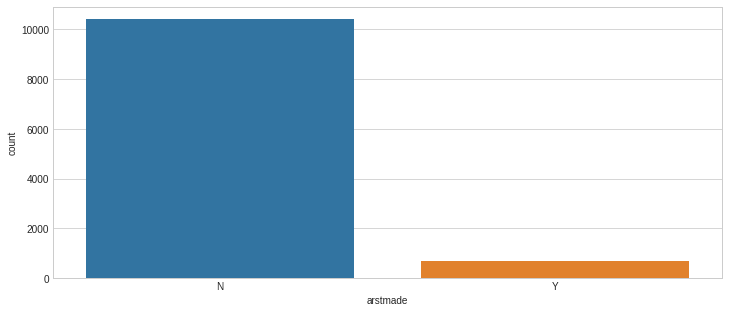

In [91]:
# Se analiza el vector objetivo arstmade, de si el evento fue un arresto o no
plt.figure(figsize=(12,5))
print(round(df_concat_limpio_2.arstmade.value_counts("%"),2))
sns.countplot(df_concat_limpio_2.arstmade);

__COMENTARIO__

<div class = "pull-left" style="color:blue"> 

Vemos que el vector objetivo arstmade "WAS AN ARREST MADE ?" está bastante desbalanceado, con un 94% indicando que el registro NO fue un arresto

In [92]:
# De forma análoga visto anteriormente, se creará tabla con la cantidad de datos perdidos y su tipo de variable
# Primero se creará un dataset con los datos necesarios
nombre,valores_unicos,tipo = [],[],[]
for i in df_concat_limpio_2.drop(columns="arstmade").columns:
    nombre.append(i)
    valores_unicos.append(len(df_concat_limpio_2[i].unique()))
    tipo.append(df_concat_limpio_2[i].dtype)
user_list = list(zip(nombre, valores_unicos,tipo))
data_concat = pd.DataFrame(user_list,columns=['nombre','n valores unicos', 'tipo'])
data_concat

nombre  n valores unicos    tipo
0       year                 2   int64
1        pct                76   int64
2    ser_num              7521   int64
3   datestop               730   int64
4   timestop              1201   int64
..       ...               ...     ...
89    xcoord              7943  object
90    ycoord              8827  object
91  dettypcm                 1  object
92    linecm                 2  object
93  detailcm               127  object

[94 rows x 3 columns]

In [93]:
# Identificar las variables con solo 1 valor único
data4_concat = data_concat[data_concat["n valores unicos"]==1]
b = list(data4_concat.nombre)
print(b)
print(len(b))
data4_concat

['compyear', 'comppct', 'adtlrept', 'machgun', 'addrtyp', 'dettypcm']
6


nombre  n valores unicos    tipo
15  compyear                 1   int64
16   comppct                 1   int64
21  adtlrept                 1  object
26   machgun                 1  object
83   addrtyp                 1  object
91  dettypcm                 1  object

In [94]:
# Eliminar las variables 
df_concat_limpio_2 = df_concat_limpio_2.drop(columns=list(data4_concat.nombre))
df_concat_limpio_2.shape

(11090, 89)

__COMENTARIO__

<div class = "pull-left" style="color:blue"> 

Se eliminan las variables con 1 valor único. Nuestro dataset quedó de 89 atributos y 11090 registros

In [95]:
# Identificar las variables categóricas con mas de 10 valores únicos
data2_concat = data_concat[np.logical_and(data_concat["tipo"]=="object",data_concat["n valores unicos"] > 10)]
a = list(data2_concat.nombre)
print(a)
data2_concat

['crimsusp', 'haircolr', 'eyecolor', 'stinter', 'crossst', 'addrpct', 'sector', 'xcoord', 'ycoord', 'detailcm']


nombre  n valores unicos    tipo
9   crimsusp               630  object
80  haircolr                11  object
81  eyecolor                11  object
84   stinter              2083  object
85   crossst              2199  object
87   addrpct               152  object
88    sector                18  object
89    xcoord              7943  object
90    ycoord              8827  object
93  detailcm               127  object

In [96]:
# Vemos el dataset
df_concat_limpio_2.head()

year  pct  ser_num  datestop  ...   xcoord   ycoord linecm detailcm
0  2009   41     1779   4032009  ...  1013067  0238633      1       20
1  2009  108     5805  10292009  ...  1012043  0212157      1       14
2  2009   43     8340  10062009  ...  1017599  0240200      1       20
3  2009   77      932   1232009  ...  1002625  0183442      1       24
4  2009  110    11224  12132009  ...  1024535  0209890      1       20

[5 rows x 89 columns]

In [97]:
# Recordamos los datos que tenemos que cambiar sus tipos de variables
data_falsos

columna tipo train tipo test  unicos train  unicos test  Validacion
8      perobs    float64     int64            40           29       False
102   addrpct      int64    object            76           77       False
109    linecm      int64    object             1            2       False
110  detailcm      int64    object            48           81       False

In [98]:
# Para este caso, se identificarán los atributos que son object
col = list(data_falsos[data_falsos["tipo test"]=="object"]["columna"])
col

['addrpct', 'linecm', 'detailcm']

In [99]:
for i in col:
    print(df_concat_limpio_2[i].dtype)

object
object
object


In [100]:
# Forzamos el cambio de tipo de variable a int64 y sobreescribimos
for i in col:
    var = df_concat_limpio_2[i]
    var = var.astype("int64")
    df_concat_limpio_2[i] = var

__COMENTARIO__

<div class = "pull-left" style="color:blue"> 

Se identifican aquellas columnas que son de tipo object pero deberían ser numéricas, como xcoord y ycoord. Y se pasarán a numéricas con el mismo procedimiento anterior.

In [101]:
# Forzamos el cambio de tipo de variable a int64 y sobreescribimos
for i in ["xcoord","ycoord"]:
    var = df_concat_limpio_2[i]
    var = var.astype("int64")
    df_concat_limpio_2[i] = var

__COMENTARIO__

<div class = "pull-left" style="color:blue"> 

Por razones de eficiencia del modelo, __se eliminarán__ las variables categóricas que tienen muchos valores únicos, tales como crimsusp (CRIME SUSPECTED), stinter (LOCATION OF STOP INTERSECTION), crossst (LOCATION OF STOP CROSS STREET). Para las variables de localización tenemos las coordenadas x/y, y además el Sector variable categórica de 18 valores únicos.
    
Se creará un nuevo objeto por si a futuro se tengan que evaluar estas variables

In [102]:
# Nuevo objeto para no perder las variables a eliminar
df_concat_limpio_3 = df_concat_limpio_2.drop(columns=["crimsusp","stinter","crossst"])
df_concat_limpio_3.shape

(11090, 86)

__COMENTARIO__

<div class = "pull-left" style="color:blue"> 

Nuestro dataset quedó de 86 atributos y 11090 registros

In [103]:
# Nuevamente se crea la data
nombre,valores_unicos,tipo = [],[],[]
for i in df_concat_limpio_3.drop(columns="arstmade").columns:
    nombre.append(i)
    valores_unicos.append(len(df_concat_limpio_3[i].unique()))
    tipo.append(df_concat_limpio_3[i].dtype)
user_list = list(zip(nombre, valores_unicos,tipo))
data_concat = pd.DataFrame(user_list,columns=['nombre','n valores unicos', 'tipo'])
data_concat

nombre  n valores unicos    tipo
0       year                 2   int64
1        pct                76   int64
2    ser_num              7521   int64
3   datestop               730   int64
4   timestop              1201   int64
..       ...               ...     ...
80    sector                18  object
81    xcoord              7585   int64
82    ycoord              7772   int64
83    linecm                 1   int64
84  detailcm                59   int64

[85 rows x 3 columns]

In [104]:
# Identificar las variables con solo 1 valor único
data4_concat = data_concat[data_concat["n valores unicos"]==1]
b = list(data4_concat.nombre)
print(b)
print(len(b))
data4_concat

['linecm']
1


nombre  n valores unicos   tipo
83  linecm                 1  int64

In [105]:
# Identificar las variables categóricas con mas de 10 valores únicos
data5_concat = data_concat[np.logical_and(data_concat["tipo"]=="object",data_concat["n valores unicos"] > 10)]
a = list(data5_concat.nombre)
print(a)
data5_concat

['haircolr', 'eyecolor', 'sector']


nombre  n valores unicos    tipo
75  haircolr                11  object
76  eyecolor                11  object
80    sector                18  object

In [106]:
# Eliminar variable de 1 valor único: linecm
df_concat_limpio_3 = df_concat_limpio_3.drop(columns=["linecm"])
df_concat_limpio_3.shape

(11090, 85)

__COMENTARIO__

<div class = "pull-left" style="color:blue"> 

Se elimina linecm porque solo tiene 1 valor único.

Nuestro dataset quedó de 85 atributos y 11090 registros-

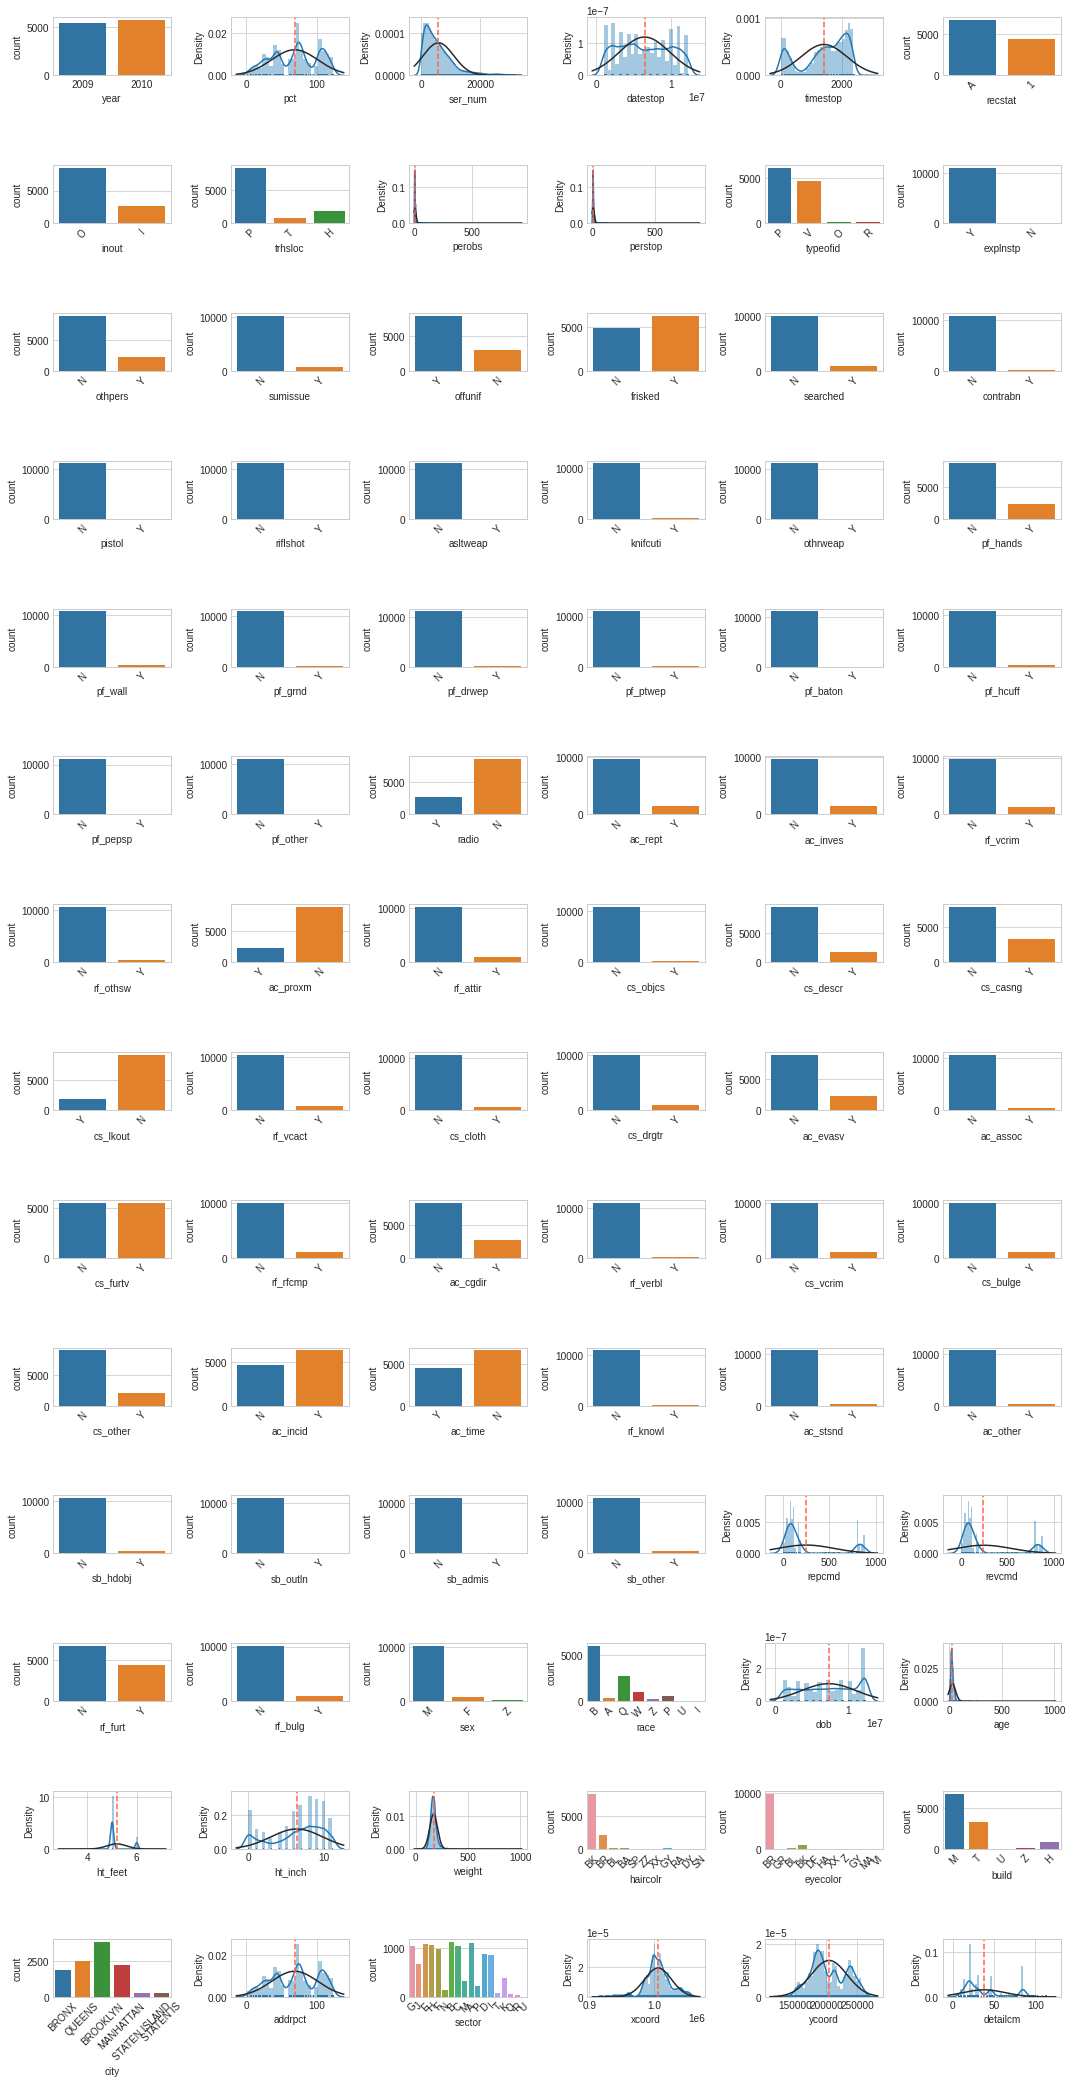

In [107]:
# Visualización de todas las variables
rows = 15; cols = round(df_concat_limpio_3.drop(columns="arstmade").shape[1]/rows)
plt.figure(figsize=(15,30))
for i,j in enumerate(df_concat_limpio_3.drop(columns="arstmade").columns):
    plt.subplot(rows, cols, i+1)
    if df_concat_limpio_3[j].dtype == 'object':
        sns.countplot(df_concat_limpio_3[j])
        plt.xticks(rotation=45)
    else:
        if len(df_concat_limpio_3[j].value_counts())>2:
            sns.distplot(df_concat_limpio_3[j],rug=True,fit=stats.norm)    
            plt.axvline(df_concat_limpio_3[j].mean(), color = "tomato", linestyle = '--')
        else:
            sns.countplot(df_concat_limpio_3[j])
    plt.tight_layout()

In [108]:
# Observación y análisis de las variables categóricas
df_concat_limpio_3.describe(include="object")

recstat  inout trhsloc typeofid  ... eyecolor  build      city sector
count    11090  11090   11090    11090  ...    11090  11090     11090  11090
unique       2      2       3        4  ...       11      5         6     18
top          A      O       P        P  ...       BR      M  BROOKLYN      B
freq      6685   8469    8430     6079  ...     9950   6756      3892   1131

[4 rows x 67 columns]

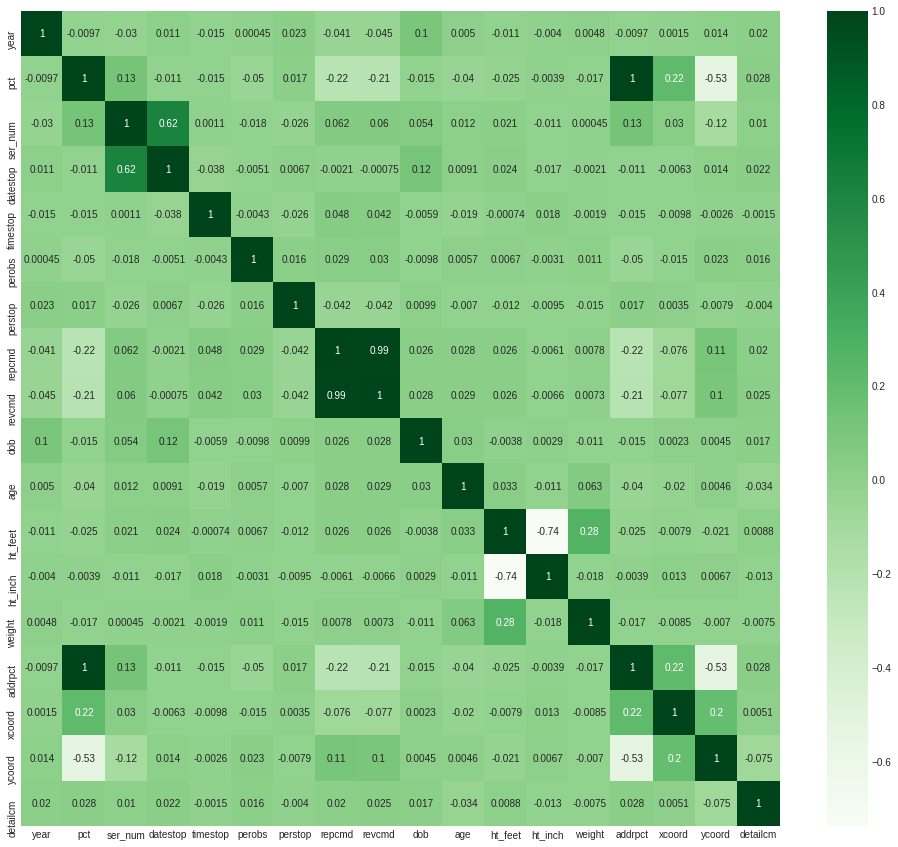

In [109]:
# Se revisa la correlación entre las variables
plt.figure(figsize=(17,15))
sns.heatmap(df_concat_limpio_3.corr(), cmap='Greens', annot=True);

In [110]:
# Se excluyen las variables con mayor correlación (mayor a 70%)
df_concat_limpio_3 = df_concat_limpio_3.drop(columns=["ht_inch","revcmd","addrpct"])
df_concat_limpio_3.shape

(11090, 82)

__COMENTARIO__

<div class = "pull-left" style="color:blue"> 
    
Las variables con mayor correlación son (_mayor a 70%_): "revcmd REVIEWING OFFICER'S COMMAND (1 TO 999)" junto con "repcmd REPORTING OFFICER'S COMMAND (1 TO 999)"; "ht_feet SUSPECT'S HEIGHT (FEET)" junto con "ht_inch SUSPECT'S HEIGHT (INCHES)" porque representan lo mismo pero en una diferente escala; y, "pct PRECINCT OF STOP (FROM 1 TO 123)" con "addrpct LOCATION OF STOP ADDRESS PRECINCT". En este caso se excluyen solo las variables ___revcmd, ht_inchc y addrpct___.
    
Finalemnte nos quedamnos con el DATASET con __82 atributos y 11090 registros__

## Ejercicio 2
Reporte la probabilidad que un individuo sea arrestado en uno de los cinco barrios, condicional al género y a la raza. Concluya, ¿qué implicancias éticas tienen algunas conclusiones de lo que observa?.

__COMENTARIO__

<div class = "pull-left" style="color:blue"> 
    
Para resolver este ejercicio, se buscará la probabilidad de ocurrencia condicional de todos los casos posibles del __total de arrestos__ (vector objetivo positivo), según la definición de probabilidad de Laplace _"casos favorables sobre casos totales"_

BROOKLYN         3892
QUEENS           2552
MANHATTAN        2236
BRONX            1889
STATEN IS         274
STATEN ISLAND     247
Name: city, dtype: int64


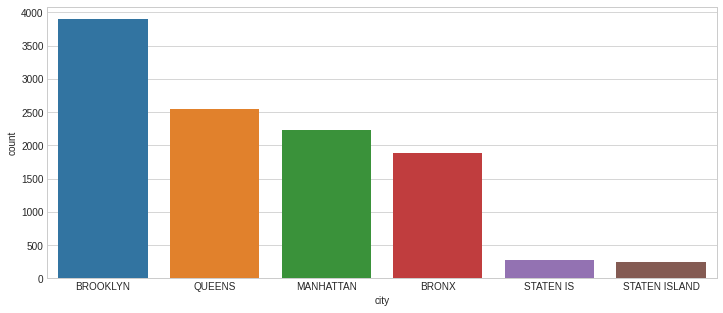

In [111]:
# Primero se analiza la muestra según Ciudad
print(df_concat_limpio_3.city.value_counts())
plt.figure(figsize=(12,5)) 
sns.countplot(df_concat_limpio_3.city, order = df_concat_limpio_3.city.value_counts().index);

__COMENTARIO__

<div class = "pull-left" style="color:blue"> 
    
Al analizar la data se ve que se puede reemplazar Staten Is a Staten Island

In [112]:
# Reemplazar valores
df_concat_limpio_3["city"] = df_concat_limpio_3["city"].replace("STATEN IS","STATEN ISLAND")

BROOKLYN         3892
QUEENS           2552
MANHATTAN        2236
BRONX            1889
STATEN ISLAND     521
Name: city, dtype: int64


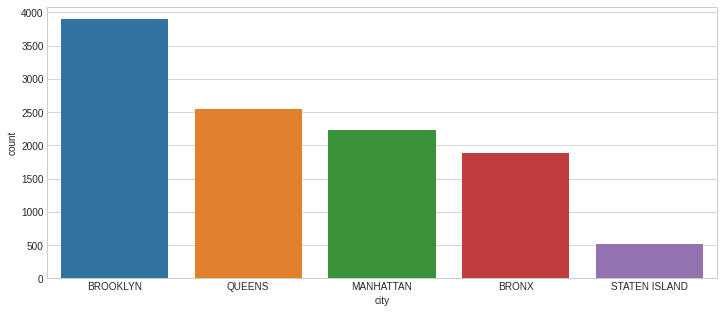

In [113]:
print(df_concat_limpio_3.city.value_counts())
plt.figure(figsize=(12,5)) 
sns.countplot(df_concat_limpio_3.city, order = df_concat_limpio_3.city.value_counts().index);

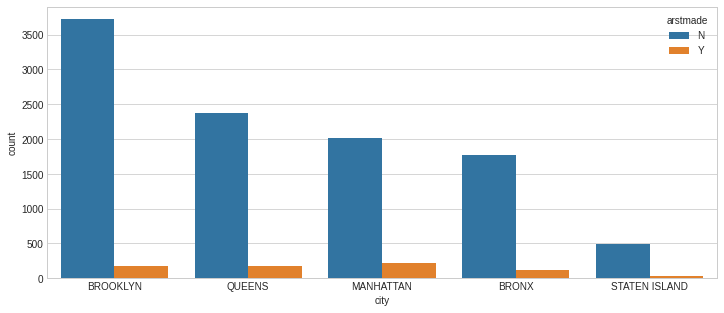

In [114]:
# Se aprecia cómo es la distribución de arrestos según las ciudades
plt.figure(figsize=(12,5)) 
sns.countplot(df_concat_limpio_3.city, order = df_concat_limpio_3.city.value_counts().index,hue = df_concat_limpio_3.arstmade);

__COMENTARIO__

<div class = "pull-left" style="color:blue"> 
    
Visualmente se aprecia que Manhattan tiene una __proporción mayor__ de arrestos versus los no arrestos.

<Figure size 864x576 with 0 Axes>

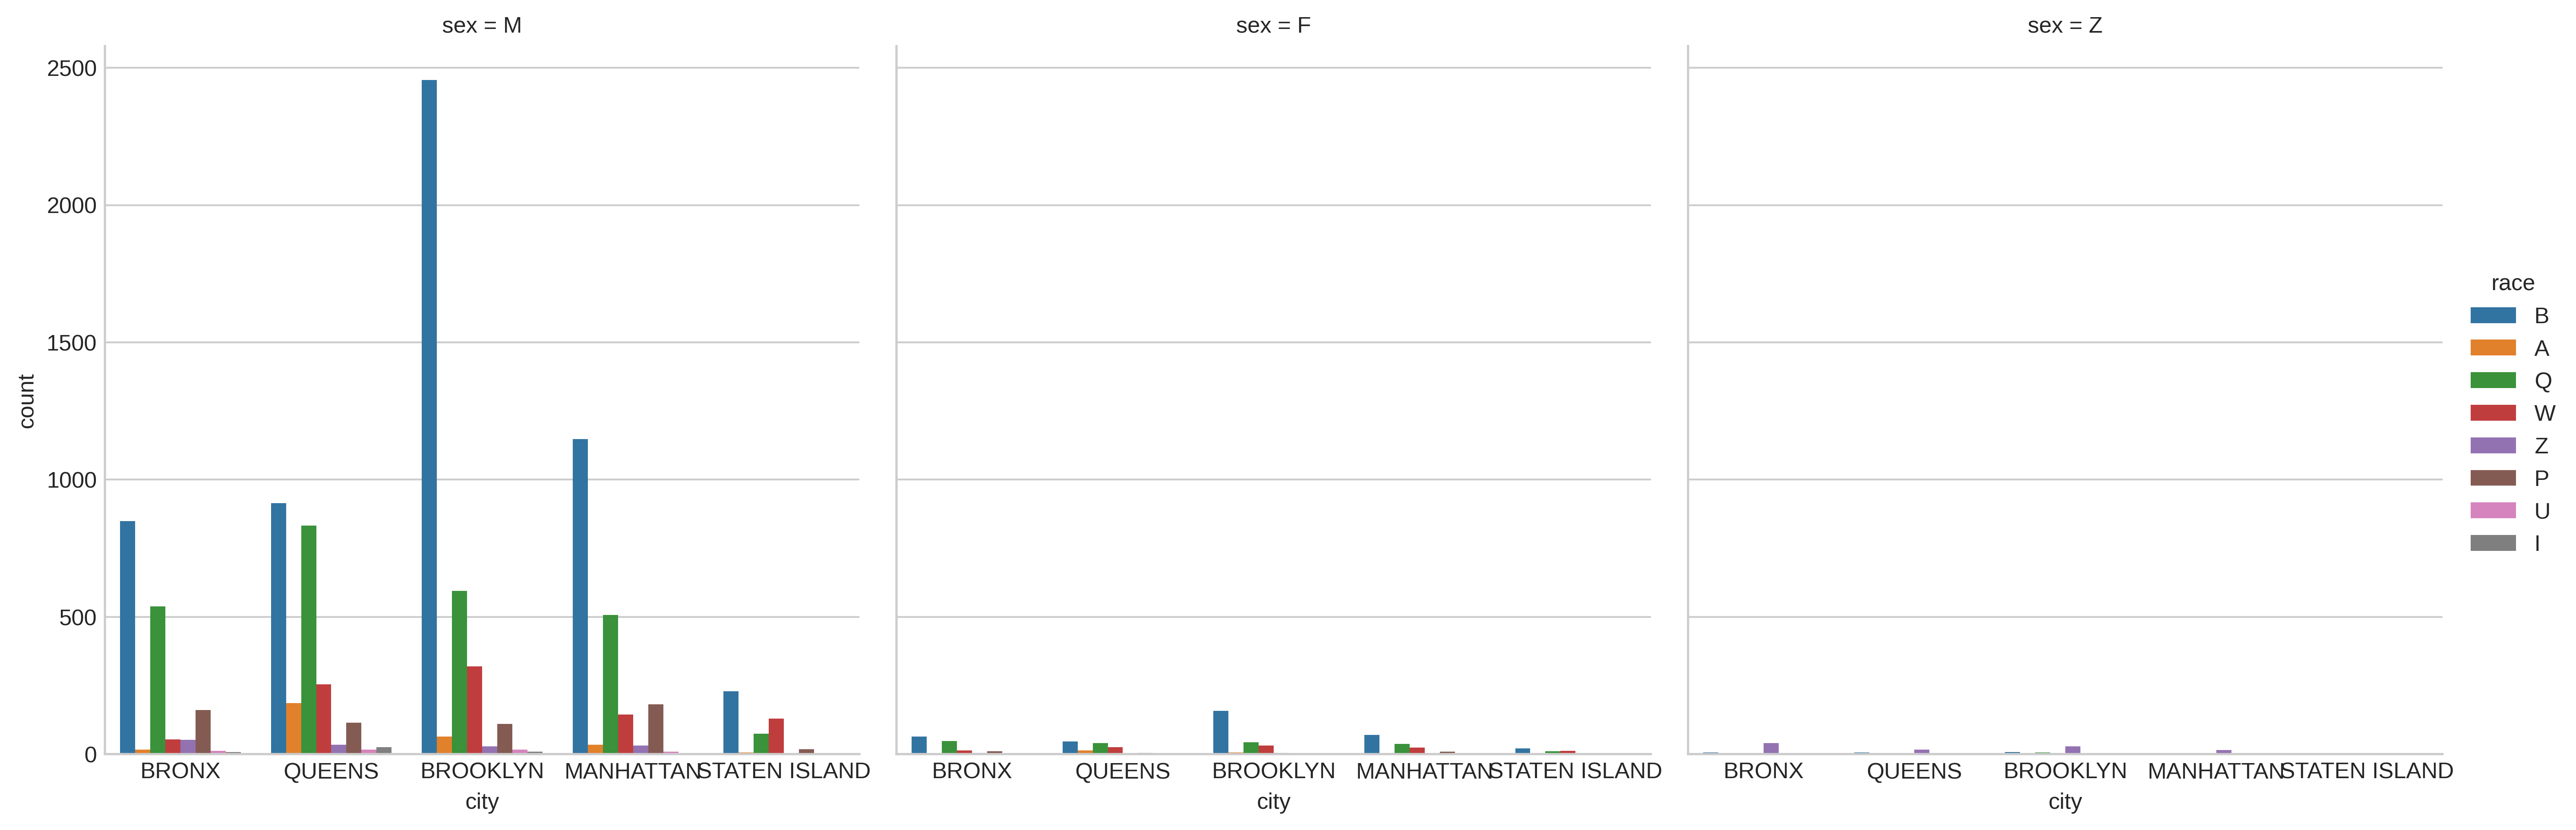

In [115]:
# Graficar las tres condicionales, sin cosiderar el arresto
plt.figure(figsize=(12,8))
plt.rcParams["figure.dpi"] = 400
sns.catplot(data = df_concat_limpio_3,
            x = "city",
            hue = "race",
            kind="count",
            col = "sex");

__COMENTARIO__

<div class = "pull-left" style="color:blue"> 
    
Sin considerar si fue un arresto o no, visualmente se aprecia que el género MALE tiene más eventos de detenciones que FEMALE y OTROS. Además, se aprecia que los hombres de raza BLACK tienen más interrogaciones que el resto de razas, y es notoriamente mayor en BROOKLYN.

In [116]:
# Se hacen listas con los datos únicos por los atributos de interés
ciudad = sorted(list(df_concat_limpio_3['city'].unique()))
sexo = sorted(list(df_concat_limpio_3['sex'].unique()))
raza = sorted(list(df_concat_limpio_3['race'].unique()))
print(ciudad)
print(sexo)
print(raza)

['BRONX', 'BROOKLYN', 'MANHATTAN', 'QUEENS', 'STATEN ISLAND']
['F', 'M', 'Z']
['A', 'B', 'I', 'P', 'Q', 'U', 'W', 'Z']


In [117]:
# Se generan las probabilidades entre los casos favorables (SI ARRESTOS)
diccionario = {}
arrestos = df_concat_limpio_3[df_concat_limpio_3["arstmade"]=="Y"]
cantidad_cero = arrestos.shape[0]
for i in ciudad:
    z = arrestos[arrestos["city"]==i]
    for j in sexo:
        a = arrestos[np.logical_and(arrestos["city"]==i,arrestos["sex"]==j)]
        for k in raza:
            b = a[a["race"]==k]
            cantidad_tres = int(b.shape[0])
            probabilidad = float(round(cantidad_tres/cantidad_cero,3))
            diccionario[str(i) + "_" + str(j) + "_" + str(k)] = (i,j,k,cantidad_tres,probabilidad)
            print("{}_{}_{} tiene una cantidad de {} y una probabilidad de ocurrencia  de {}".format(i,j,k,cantidad_tres,probabilidad))

BRONX_F_A tiene una cantidad de 0 y una probabilidad de ocurrencia  de 0.0
BRONX_F_B tiene una cantidad de 12 y una probabilidad de ocurrencia  de 0.017
BRONX_F_I tiene una cantidad de 0 y una probabilidad de ocurrencia  de 0.0
BRONX_F_P tiene una cantidad de 1 y una probabilidad de ocurrencia  de 0.001
BRONX_F_Q tiene una cantidad de 2 y una probabilidad de ocurrencia  de 0.003
BRONX_F_U tiene una cantidad de 0 y una probabilidad de ocurrencia  de 0.0
BRONX_F_W tiene una cantidad de 2 y una probabilidad de ocurrencia  de 0.003
BRONX_F_Z tiene una cantidad de 0 y una probabilidad de ocurrencia  de 0.0
BRONX_M_A tiene una cantidad de 1 y una probabilidad de ocurrencia  de 0.001
BRONX_M_B tiene una cantidad de 46 y una probabilidad de ocurrencia  de 0.066
BRONX_M_I tiene una cantidad de 0 y una probabilidad de ocurrencia  de 0.0
BRONX_M_P tiene una cantidad de 8 y una probabilidad de ocurrencia  de 0.011
BRONX_M_Q tiene una cantidad de 35 y una probabilidad de ocurrencia  de 0.05
BRONX_M

In [118]:
data_ejercicio2 = pd.DataFrame(diccionario.keys(),columns=["LLAVE"])
data_ejercicio2["Ciudad"] = np.array(list(diccionario.values()))[:,0]
data_ejercicio2["Sexo"] = np.array(list(diccionario.values()))[:,1]
data_ejercicio2["Raza"] = np.array(list(diccionario.values()))[:,2]
data_ejercicio2["Cantidad"] = np.array(list(diccionario.values()))[:,3]
data_ejercicio2["Probabilidad"] = np.array(list(diccionario.values()))[:,4]
data_ejercicio2 = data_ejercicio2.sort_values(by=['Probabilidad'], ascending=False)
data_ejercicio2.head()

LLAVE     Ciudad Sexo Raza Cantidad Probabilidad
57  MANHATTAN_M_B  MANHATTAN    M    B      108        0.154
33   BROOKLYN_M_B   BROOKLYN    M    B       98         0.14
81     QUEENS_M_B     QUEENS    M    B       65        0.093
84     QUEENS_M_Q     QUEENS    M    Q       50        0.071
9       BRONX_M_B      BRONX    M    B       46        0.066

__CONCLUSION__

<div class = "pull-left" style="color:blue"> 
    
Se concluye que entre todos los arrestos la mayor probabilidad ocurre en Manhattan cuando el sujeto es de sexo "Hombre" de raza "Black". Además las mayores probabilidades de ocurrencia se repiten entre el sexo "Hombre" y raza "Black".

Además, esto conlleva a un seso ético ya que la mayor cantidad de detenciones de hombres negros pero esto no implica que haya terminado en un arresto. Implica que en New York se detienen a más sujetos con estas caractísticas a priori. 

## Ejercicio 3
Entregue un modelo predictivo que prediga efectivamente si un determinado procedimiento concluirá en un arresto o no. Para ello, guíate por los siguientes lineamientos:
* Entrene por lo menos 3 modelos que sean capaces de predecir si se producirá un arresto o no. Una vez que encuentre un modelo satisfactorio, reporte al menos dos métricas de desempeño.
* Refine aquellos atributos relevantes con alguna estrategia que crea conveniente y reporte por lo menos 5 atributos relevantes para realizar la predicción.

__COMENTARIO__

<div class = "pull-left" style="color:blue"> 
    
Primero se binariza el dataset para poder trabajar los distintos modelos

In [119]:
def binarizador (df):
    """Binariza el dataframe ingresado
    Parametros:
        df(df): DataFrame
    Retorno:
        Devuelve un df binarizado 
    """
    import pandas as pd

    #declaramos un df vacio a utilizar 
    df_binarizado = pd.DataFrame()
    #obtenemos una lista de las variables categóricas
    variables_categoricas = list(df.select_dtypes(object).columns)

    #binarizamos las variables categóricas        
    df_binarizado=pd.get_dummies(data=df, columns=variables_categoricas,drop_first=True)

    #reemplazamos el caracter '-' por '_' en los nombres de las variables
    #para evitar problemas futuros en el modelamiento
    df_binarizado=df_binarizado.rename(columns=lambda x: x.replace("-","_"))

    return df_binarizado

In [120]:
# Binarizar con get-dummys variables categóricas y binarias
df_binarizado = binarizador(df_concat_limpio_3)
print(df_binarizado.shape)
df_binarizado.head()

(11090, 132)


year  pct  ser_num  datestop  ...  sector_Q  sector_R  sector_T  sector_U
0  2009   41     1779   4032009  ...         0         0         0         0
1  2009  108     5805  10292009  ...         0         0         0         0
2  2009   43     8340  10062009  ...         0         0         0         0
3  2009   77      932   1232009  ...         0         0         0         0
4  2009  110    11224  12132009  ...         0         0         0         0

[5 rows x 132 columns]

__COMENTARIO__

<div class = "pull-left" style="color:blue"> 

El dataset binarizado quedó de __132 atributos y 11090 registros__

In [121]:
# Observación y análisis de las variables categóricas
df_binarizado.describe(include="int64")

year           pct  ...         ycoord      detailcm
count  11090.000000  11090.000000  ...   11090.000000  11090.000000
mean    2009.513706     68.590712  ...  204255.084220     37.960775
std        0.499835     32.774530  ...   29061.663297     25.270980
min     2009.000000      1.000000  ...  122790.000000      6.000000
25%     2009.000000     42.000000  ...  182954.500000     20.000000
50%     2010.000000     73.000000  ...  197736.000000     28.000000
75%     2010.000000    102.000000  ...  231628.500000     46.000000
max     2010.000000    123.000000  ...  269117.000000    113.000000

[8 rows x 14 columns]

In [122]:
# Observación y análisis de las variables categóricas
df_binarizado.describe(include="float64")

perobs
count  11090.000000
mean       2.628779
std        9.854787
min        0.000000
25%        1.000000
50%        1.000000
75%        2.000000
max      926.000000

In [123]:
# Se binarizará la variable nominal como el año (year)
df_binarizado_2 = pd.DataFrame()
df_binarizado_2=pd.get_dummies(data=df_binarizado, columns=["year"] ,drop_first=True)
df_binarizado_2=df_binarizado_2.rename(columns=lambda x: x.replace("-","_"))
df_binarizado_2.sample(5)

pct  ser_num  datestop  timestop  ...  sector_R  sector_T  sector_U  year_2010
3042  102     6397  12152009       830  ...         0         0         0          0
630   110     7376   7212009        15  ...         0         0         0          0
1792  101     6682   9292009      2000  ...         0         0         0          0
3783   40     3887   3092010      2230  ...         0         0         0          1
2829   67     6577   6212010      2230  ...         0         0         0          1

[5 rows x 132 columns]

In [124]:
# from datetime import datetime

def convertir_fecha(x):
    """
    Convierte un entero en unidad de fecha, según formato y,m,d
    Parámetro: número entero
    Retorna: Formato fecha (YYYY,mm,dd)
    
    """
    una_fecha = str(x)
    if len(una_fecha)==7:
        m = int(una_fecha[:1])
        d = int(una_fecha[1:3])
        y = int(una_fecha[3:7])
    else:
        m = int(una_fecha[:2])
        d = int(una_fecha[2:4])
        y = int(una_fecha[4:8])
    fecha = datetime(y, m, d)
    return fecha

In [125]:
# Sobreescribir las columnas de datestop y dob en formato fecha
df_binarizado_2["datestop"] = df_binarizado_2["datestop"].apply(lambda x: convertir_fecha(x))
df_binarizado_2["dob"] = df_binarizado_2["dob"].apply(lambda x: convertir_fecha(x))

In [126]:
df_binarizado_2

pct  ser_num   datestop  ...  sector_T  sector_U  year_2010
0      41     1779 2009-04-03  ...         0         0          0
1     108     5805 2009-10-29  ...         0         0          0
2      43     8340 2009-10-06  ...         0         0          0
3      77      932 2009-01-23  ...         0         0          0
4     110    11224 2009-12-13  ...         0         0          0
...   ...      ...        ...  ...       ...       ...        ...
6008   60     7062 2010-09-26  ...         0         0          1
6009   75    15797 2010-07-30  ...         0         0          1
6010  123      830 2010-04-30  ...         0         0          1
6011  115    13122 2010-11-23  ...         0         0          1
6012   14      219 2010-01-06  ...         0         0          1

[11090 rows x 132 columns]

In [127]:
# from datetime import datetime

def desglose_fecha(df,columna):
    """
    Desglosa la fecha en distintas columnas: número del día, día de la semana, nombre del mes y año.
    Parámetros: df_ DataFrame a utilizar. columna: atributo que se quiere utilizar
    Retorna: El DataFrame con las nuevas columnas agregadas: número del día, día de la semana, nombre del mes y año.
    
    """
    
    months = ("Enero", "Febrero", "Marzo", "Abril", "Mayo", "Junio", "Julio", "Agosto", "Septiembre", "Octubre", "Noviembre", "Diciembre")
    dias = ("Lunes","Martes", "Miércoles", "Jueves", "Viernes", "Sábado", "Domingo")
    
    df[columna + "_nday"] = df[columna].apply(lambda x: x.day)
    df[columna + "_day"] = df[columna].apply(lambda x: dias[int(x.strftime("%w")) - 1])
    df[columna + "_month"] = df[columna].apply(lambda x: months[x.month - 1])
    df[columna + "_year"] = df[columna].apply(lambda x: x.year)
    
    return df

In [128]:
for i in ['datestop','dob']:
    desglose_fecha(df_binarizado_2,i)

In [129]:
df_binarizado_2

pct  ser_num   datestop  ...    dob_day   dob_month  dob_year
0      41     1779 2009-04-03  ...  Miércoles       Julio      1984
1     108     5805 2009-10-29  ...  Miércoles   Diciembre      1993
2      43     8340 2009-10-06  ...    Viernes       Julio      1987
3      77      932 2009-01-23  ...     Jueves       Marzo      1986
4     110    11224 2009-12-13  ...    Domingo  Septiembre      1991
...   ...      ...        ...  ...        ...         ...       ...
6008   60     7062 2010-09-26  ...  Miércoles     Febrero      1990
6009   75    15797 2010-07-30  ...  Miércoles     Febrero      1987
6010  123      830 2010-04-30  ...     Jueves      Agosto      1962
6011  115    13122 2010-11-23  ...  Miércoles   Diciembre      1990
6012   14      219 2010-01-06  ...     Jueves       Marzo      1973

[11090 rows x 140 columns]

In [130]:
# Se eliminan las variables de fechas originales datestop y dob
df_binarizado_2 = df_binarizado_2.drop(columns = ['datestop','dob'])

In [131]:
df_binarizado_2

pct  ser_num  timestop  perobs  ...  dob_nday    dob_day   dob_month  dob_year
0      41     1779       130     1.0  ...        11  Miércoles       Julio      1984
1     108     5805      1050     3.0  ...        15  Miércoles   Diciembre      1993
2      43     8340      1450     1.0  ...         3    Viernes       Julio      1987
3      77      932      1843     5.0  ...        13     Jueves       Marzo      1986
4     110    11224      1655     3.0  ...        22    Domingo  Septiembre      1991
...   ...      ...       ...     ...  ...       ...        ...         ...       ...
6008   60     7062        45     2.0  ...        21  Miércoles     Febrero      1990
6009   75    15797        10     1.0  ...        11  Miércoles     Febrero      1987
6010  123      830      1630     3.0  ...         9     Jueves      Agosto      1962
6011  115    13122      2100     1.0  ...        19  Miércoles   Diciembre      1990
6012   14      219      1406     4.0  ...        29     Jueves       Marzo      1973

[11090 rows x 138 columns]

In [132]:
# Crear lista de las columnas nuevas
nuevas_col = list(df_binarizado_2.filter(regex='^datestop_', axis=1).columns) + list(df_binarizado_2.filter(regex='^dob_', axis=1).columns)
nuevas_col

['datestop_nday',
 'datestop_day',
 'datestop_month',
 'datestop_year',
 'dob_nday',
 'dob_day',
 'dob_month',
 'dob_year']

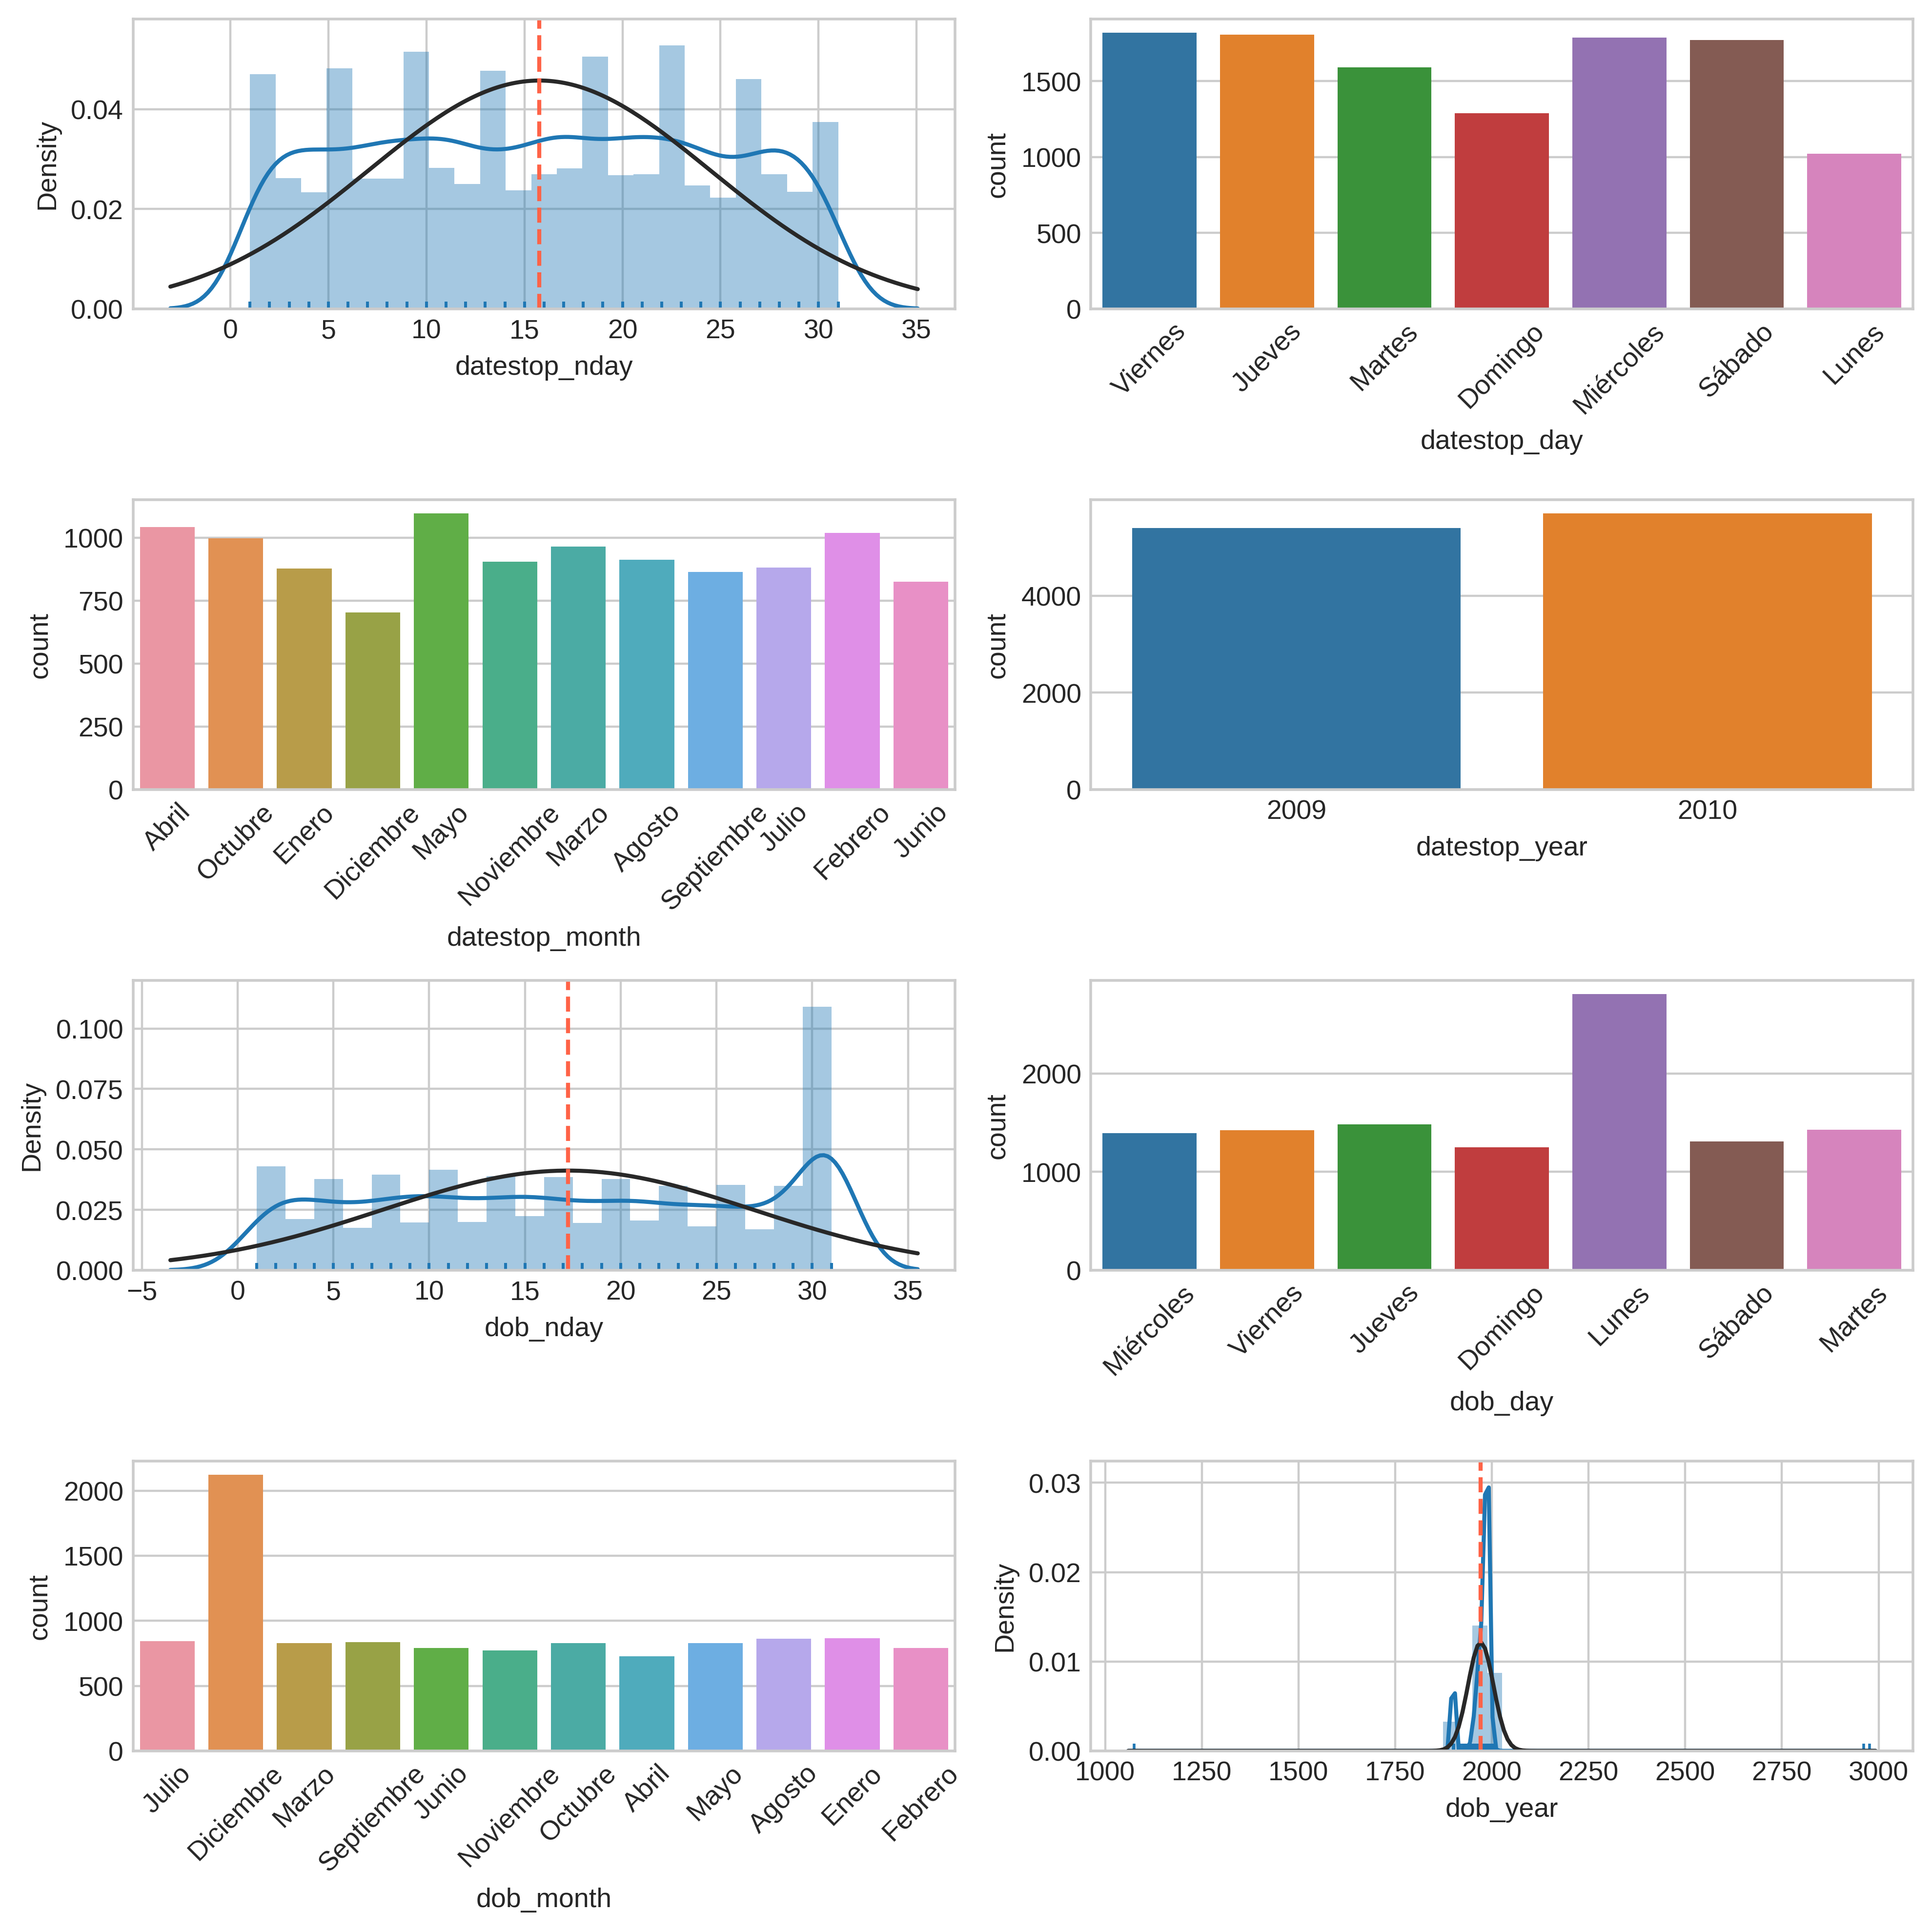

In [133]:
# Visualización de las nuevas variables
rows = 4; cols = 2
plt.figure(figsize=(10,10))
for i,j in enumerate(nuevas_col):
    plt.subplot(rows, cols, i+1)
    if df_binarizado_2[j].dtype == 'object':
        sns.countplot(df_binarizado_2[j])
        plt.xticks(rotation=45)
    else:
        if len(df_binarizado_2[j].value_counts())>2:
            sns.distplot(df_binarizado_2[j],rug=True,fit=stats.norm)    
            plt.axvline(df_binarizado_2[j].mean(), color = "tomato", linestyle = '--')
        else:
            sns.countplot(df_binarizado_2[j])
    plt.tight_layout()

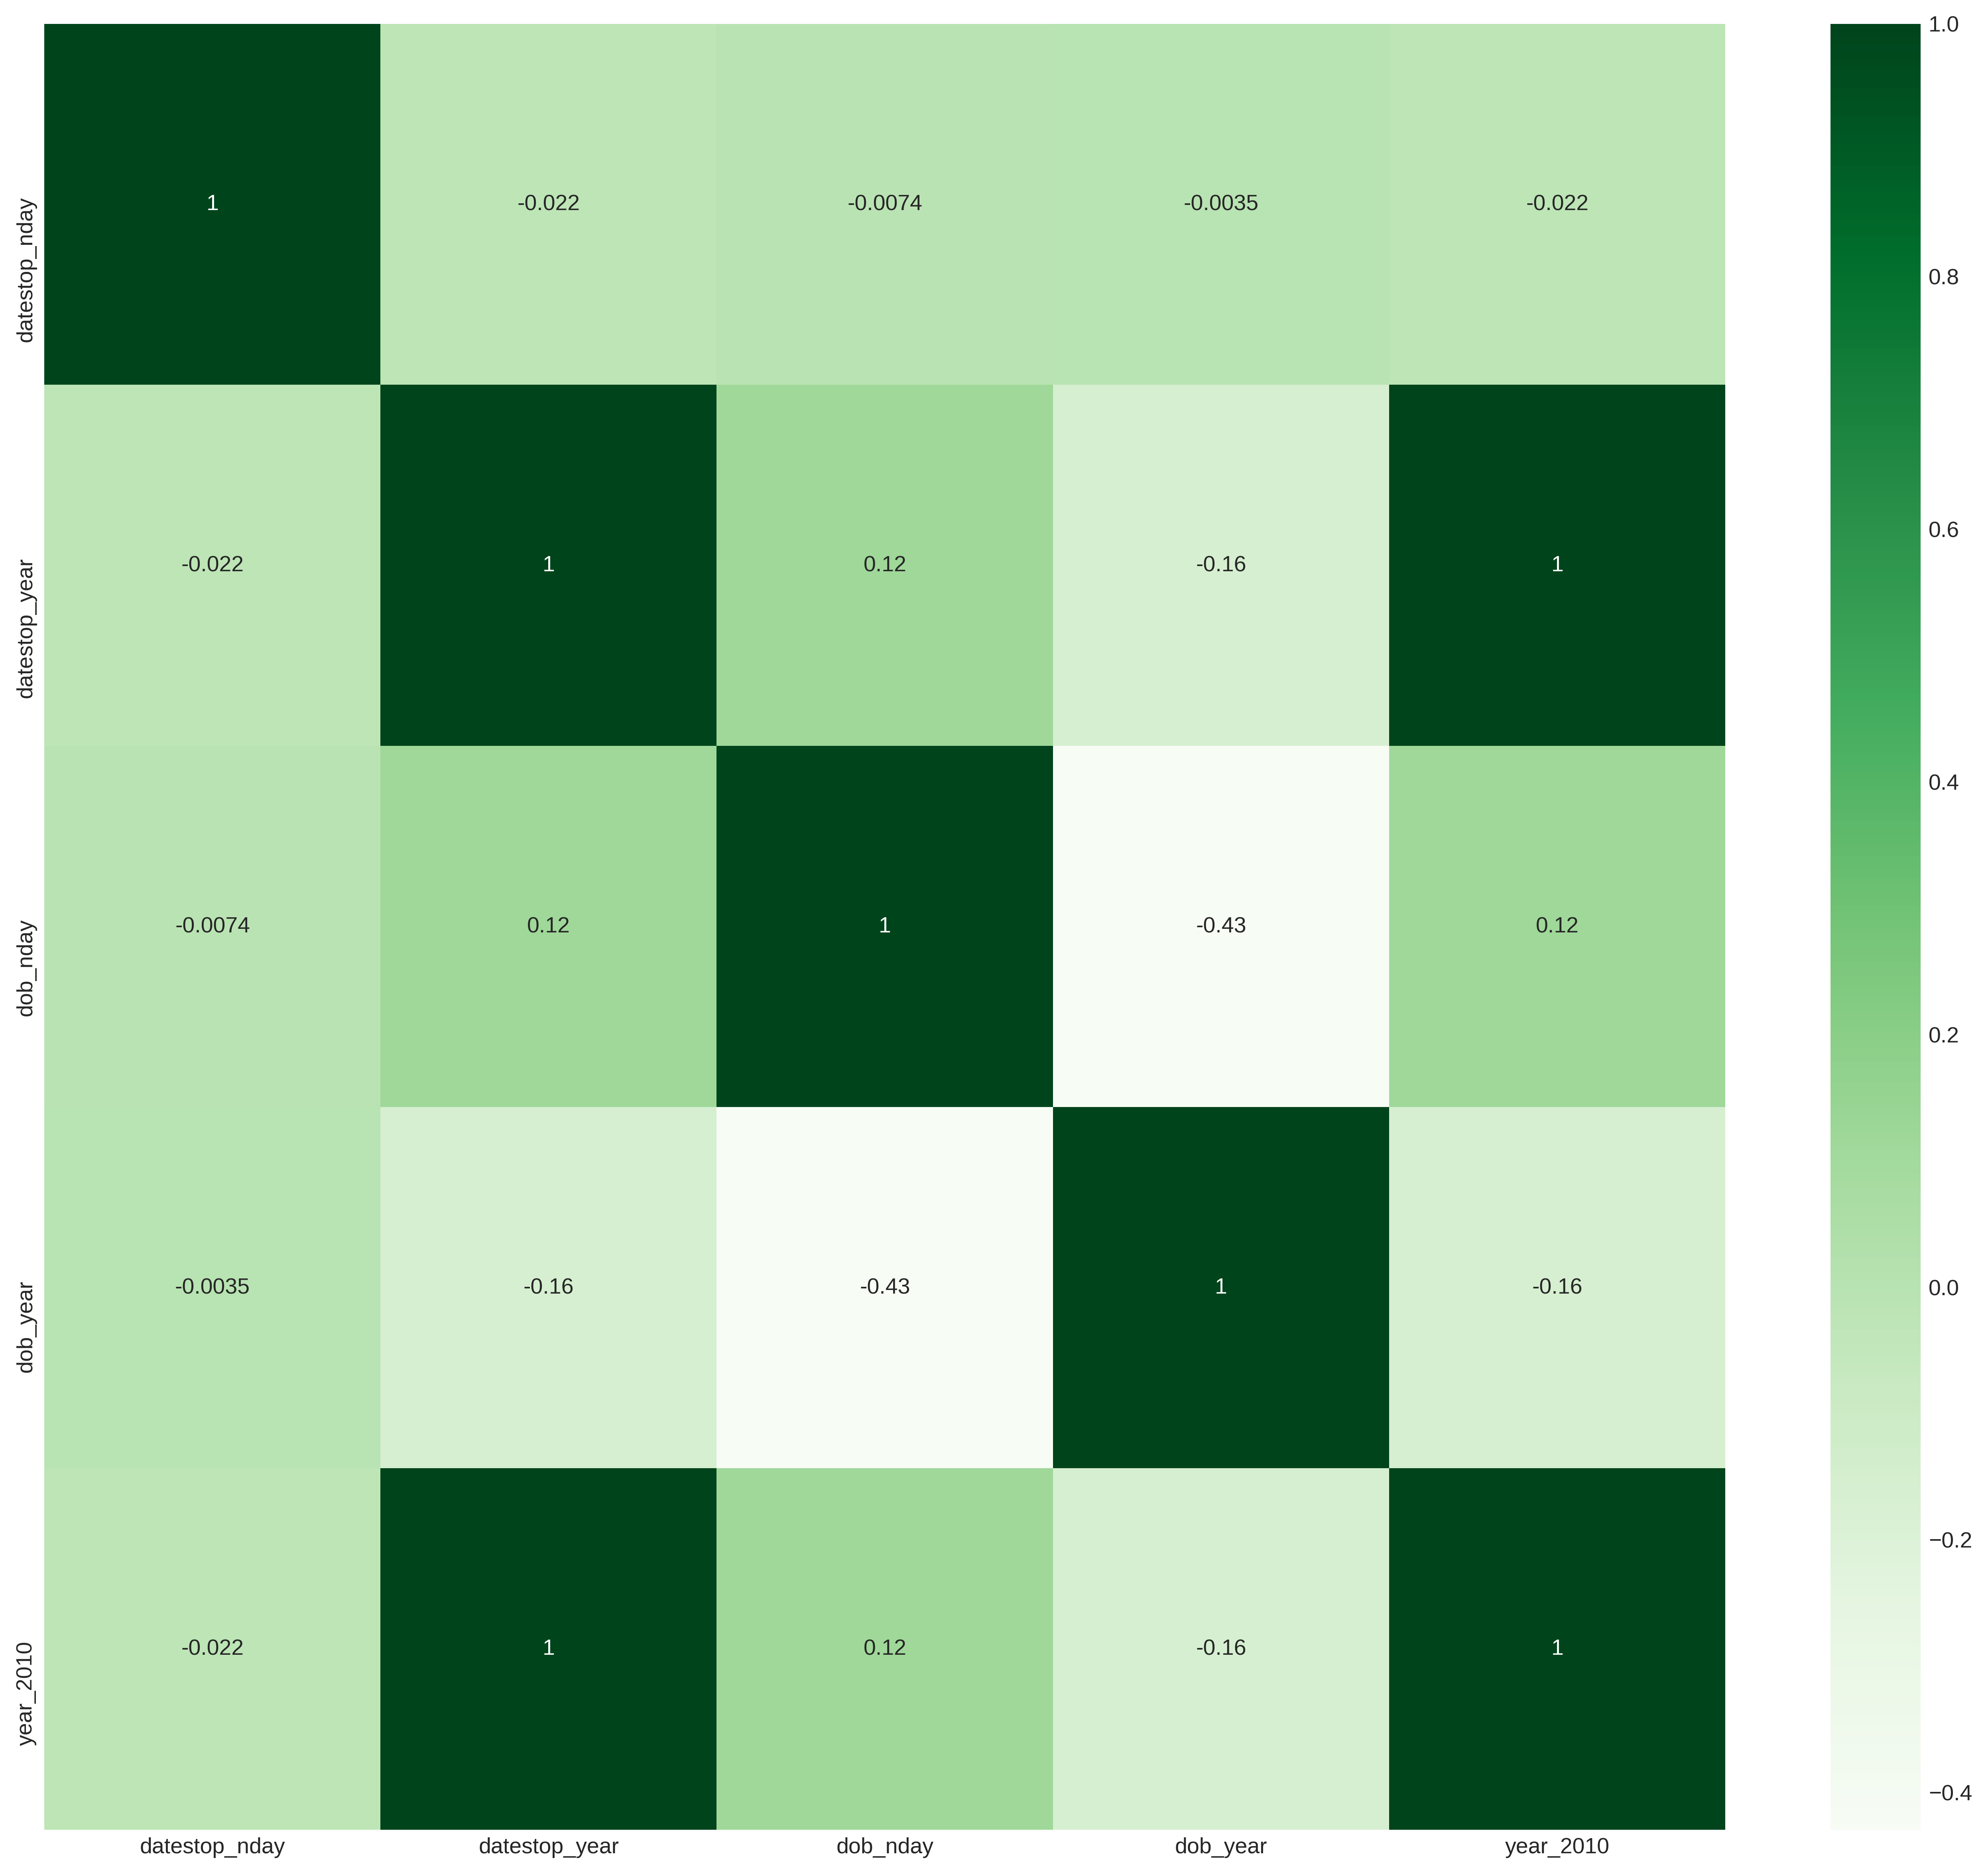

In [134]:
# Se revisa la correlación entre las variables junto con la varible year_2010
plt.figure(figsize=(17,15))
cc = df_binarizado_2.loc[:,nuevas_col+["year_2010"]]
sns.heatmap(cc.corr(), cmap='Greens', annot=True);

In [135]:
#Se elimina la variable con mayor correlación
df_binarizado_2 = df_binarizado_2.drop(columns = "datestop_year")
df_binarizado_2

pct  ser_num  timestop  perobs  ...  dob_nday    dob_day   dob_month  dob_year
0      41     1779       130     1.0  ...        11  Miércoles       Julio      1984
1     108     5805      1050     3.0  ...        15  Miércoles   Diciembre      1993
2      43     8340      1450     1.0  ...         3    Viernes       Julio      1987
3      77      932      1843     5.0  ...        13     Jueves       Marzo      1986
4     110    11224      1655     3.0  ...        22    Domingo  Septiembre      1991
...   ...      ...       ...     ...  ...       ...        ...         ...       ...
6008   60     7062        45     2.0  ...        21  Miércoles     Febrero      1990
6009   75    15797        10     1.0  ...        11  Miércoles     Febrero      1987
6010  123      830      1630     3.0  ...         9     Jueves      Agosto      1962
6011  115    13122      2100     1.0  ...        19  Miércoles   Diciembre      1990
6012   14      219      1406     4.0  ...        29     Jueves       Marzo      1973

[11090 rows x 137 columns]

In [136]:
# Crear nueva lista de las columnas nuevas
nuevas_col_2 = list(df_binarizado_2.filter(regex='^datestop_', axis=1).columns) + list(df_binarizado_2.filter(regex='^dob_', axis=1).columns)
nuevas_col_2

['datestop_nday',
 'datestop_day',
 'datestop_month',
 'dob_nday',
 'dob_day',
 'dob_month',
 'dob_year']

In [137]:
nuevas_col_categ = list(df_binarizado_2.loc[:,nuevas_col_2].select_dtypes(object).columns)      
df_binarizado_3 = pd.get_dummies(data=df_binarizado_2, columns=nuevas_col_categ,drop_first=True)
df_binarizado_3 = df_binarizado_3.rename(columns=lambda x: x.replace("-","_"))
print(df_binarizado_3.shape)
df_binarizado_3.head()

(11090, 167)


pct  ser_num  ...  dob_month_Octubre  dob_month_Septiembre
0   41     1779  ...                  0                     0
1  108     5805  ...                  0                     0
2   43     8340  ...                  0                     0
3   77      932  ...                  0                     0
4  110    11224  ...                  0                     1

[5 rows x 167 columns]

__COMENTARIO__

<div class = "pull-left" style="color:blue"> 

FINALMENTE el dataset binarizado quedó de __167 atributos y 11090 registros__

__COMENTARIO__

<div class = "pull-left" style="color:blue"> 

Ahora se separa la muestra entre entrenamiento y validación

<i><h2 style="text-align:center;color:#FFFFF"> Definición de entrenamiento y validación</h2></i>

__COMENTARIO__

<div class = "pull-left" style="color:blue"> 

Se sabe que la data viene muy desbalanceada, y como se vio en clases, se debe seguir la siguiente lógica: entrenamiento se hace de forma normal, y el testeo de forma balanceada. Se comprobará como está la muestra de validación.
    
Después de correr los modelos, junto con su respectivo Gridsearch, los resultados fueron bastantes buenos __para todos__ en Accuracy (>95%) y F1-score de los 0 muy buenos (>90%), no así para F1-score de los 1. Esto fue porque la data estaba muy desbalanceada para los 0. En base a ello, se decide BALANCEAR el vector objetivo para el conjunto de validación.
    
En honor al tiempo y a los recursos computacionales, se decide eliminar ese procedimiento anterior y directamente se procederá con el resultado de la data balanceada en validación.

In [138]:
# Se separa la muestra total
X = df_binarizado_3.drop(columns='arstmade_Y')
y = df_binarizado_3['arstmade_Y']
X_train, X_test_pre, y_train, y_test_pre = train_test_split(X, y, test_size = 0.33, random_state = 18273)

0    3440
1     220
Name: arstmade_Y, dtype: int64


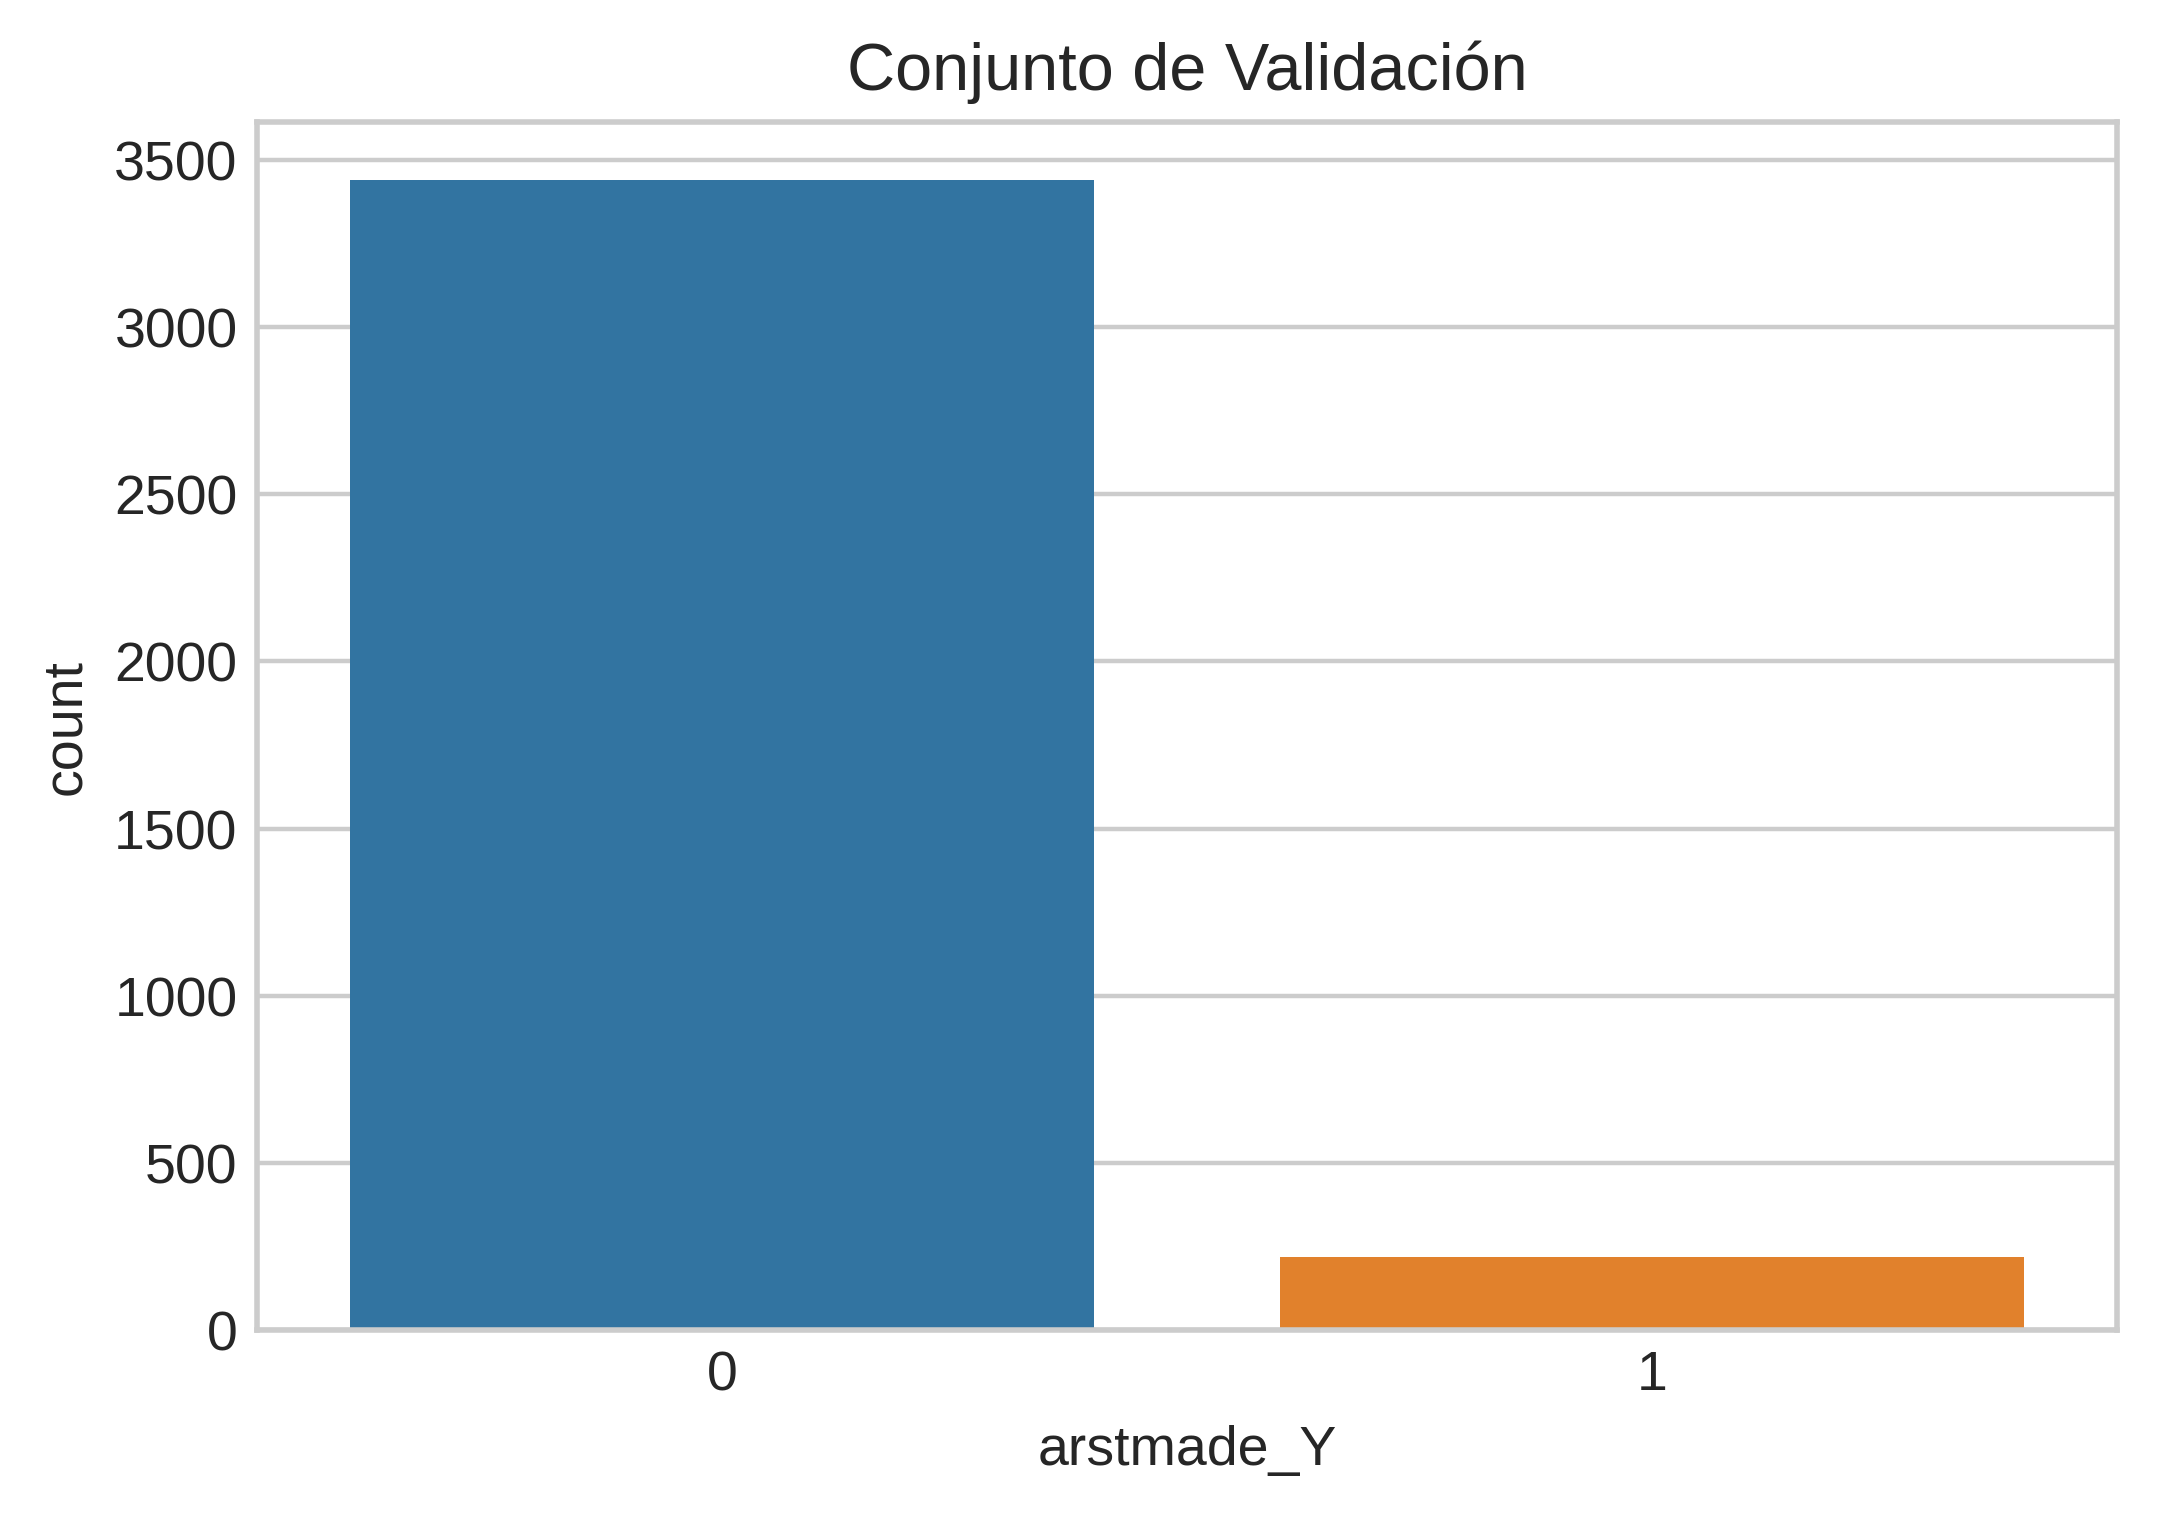

In [139]:
# Comprobar la data desbalanceada en el conjunto de validación
print(y_test_pre.value_counts())
plt.title("Conjunto de Validación")
sns.countplot(y_test_pre, order = y_test_pre.value_counts().index);

In [140]:
# Porcentaje a utilizar para obtener 220 registros 0 en validación
round(220*100/3440,7)

6.3953488

__COMENTARIO__

<div class = "pull-left" style="color:blue"> 
    
Se comprueba que la muestra de validación esta desbalanceada. Se buscarán 220 muestras de 0 para juntarlas con las 220 de 1 para que esté balanceado. Cabe destacar que los 0 que se saquen NO entrarán al conjunto de entrenamiento para no desbalancear más ese conjunto. El porcentaje que se aplicará será 6.3953488 para obtener 220 de 3440 registros.

In [141]:
# Se concatena x e y test para tener el conjunto
df_concat_test = pd.concat([X_test_pre,y_test_pre],axis=1)
print(df_concat_test.shape)
df_concat_test.head()

(3660, 167)


pct  ser_num  ...  dob_month_Septiembre  arstmade_Y
1389   90     2940  ...                     0           0
2680   48     1109  ...                     0           1
5276   81      974  ...                     0           0
1939   40    11850  ...                     1           0
5660   49     5165  ...                     0           0

[5 rows x 167 columns]

In [142]:
# Se sacan solo los 0
ceros = df_concat_test[df_concat_test.arstmade_Y == 0]
ceros.shape

(3440, 167)

In [143]:
# Se separa la muestra
X_ceros = ceros.drop(columns='arstmade_Y')
y_ceros = ceros['arstmade_Y']
X_fuera, X_test_ceros, y_fuera, y_test_ceros = train_test_split(X_ceros, y_ceros, test_size = 0.063953488, random_state = 18273)

In [144]:
# Comprobar que sean solo 220 registros
print(y_test_ceros.shape)
X_test_ceros.shape

(220,)


(220, 166)

In [145]:
# Tener los 1 anteriores
unos = df_concat_test[df_concat_test.arstmade_Y == 1]
unos.shape

(220, 167)

In [146]:
X_test_unos = unos.drop(columns='arstmade_Y')
y_test_unos = unos['arstmade_Y']

In [147]:
# Comprobar que sean solo 220 registros
print(y_test_unos.shape)
X_test_unos.shape

(220,)


(220, 166)

In [148]:
# Se concatenan los 0 con los 1 para finalmente obtener los conjuntos de validación balanceados
X_test = pd.concat([X_test_unos,X_test_ceros])
y_test = pd.concat([y_test_unos,y_test_ceros])
y_test.shape

(440,)

1    220
0    220
Name: arstmade_Y, dtype: int64


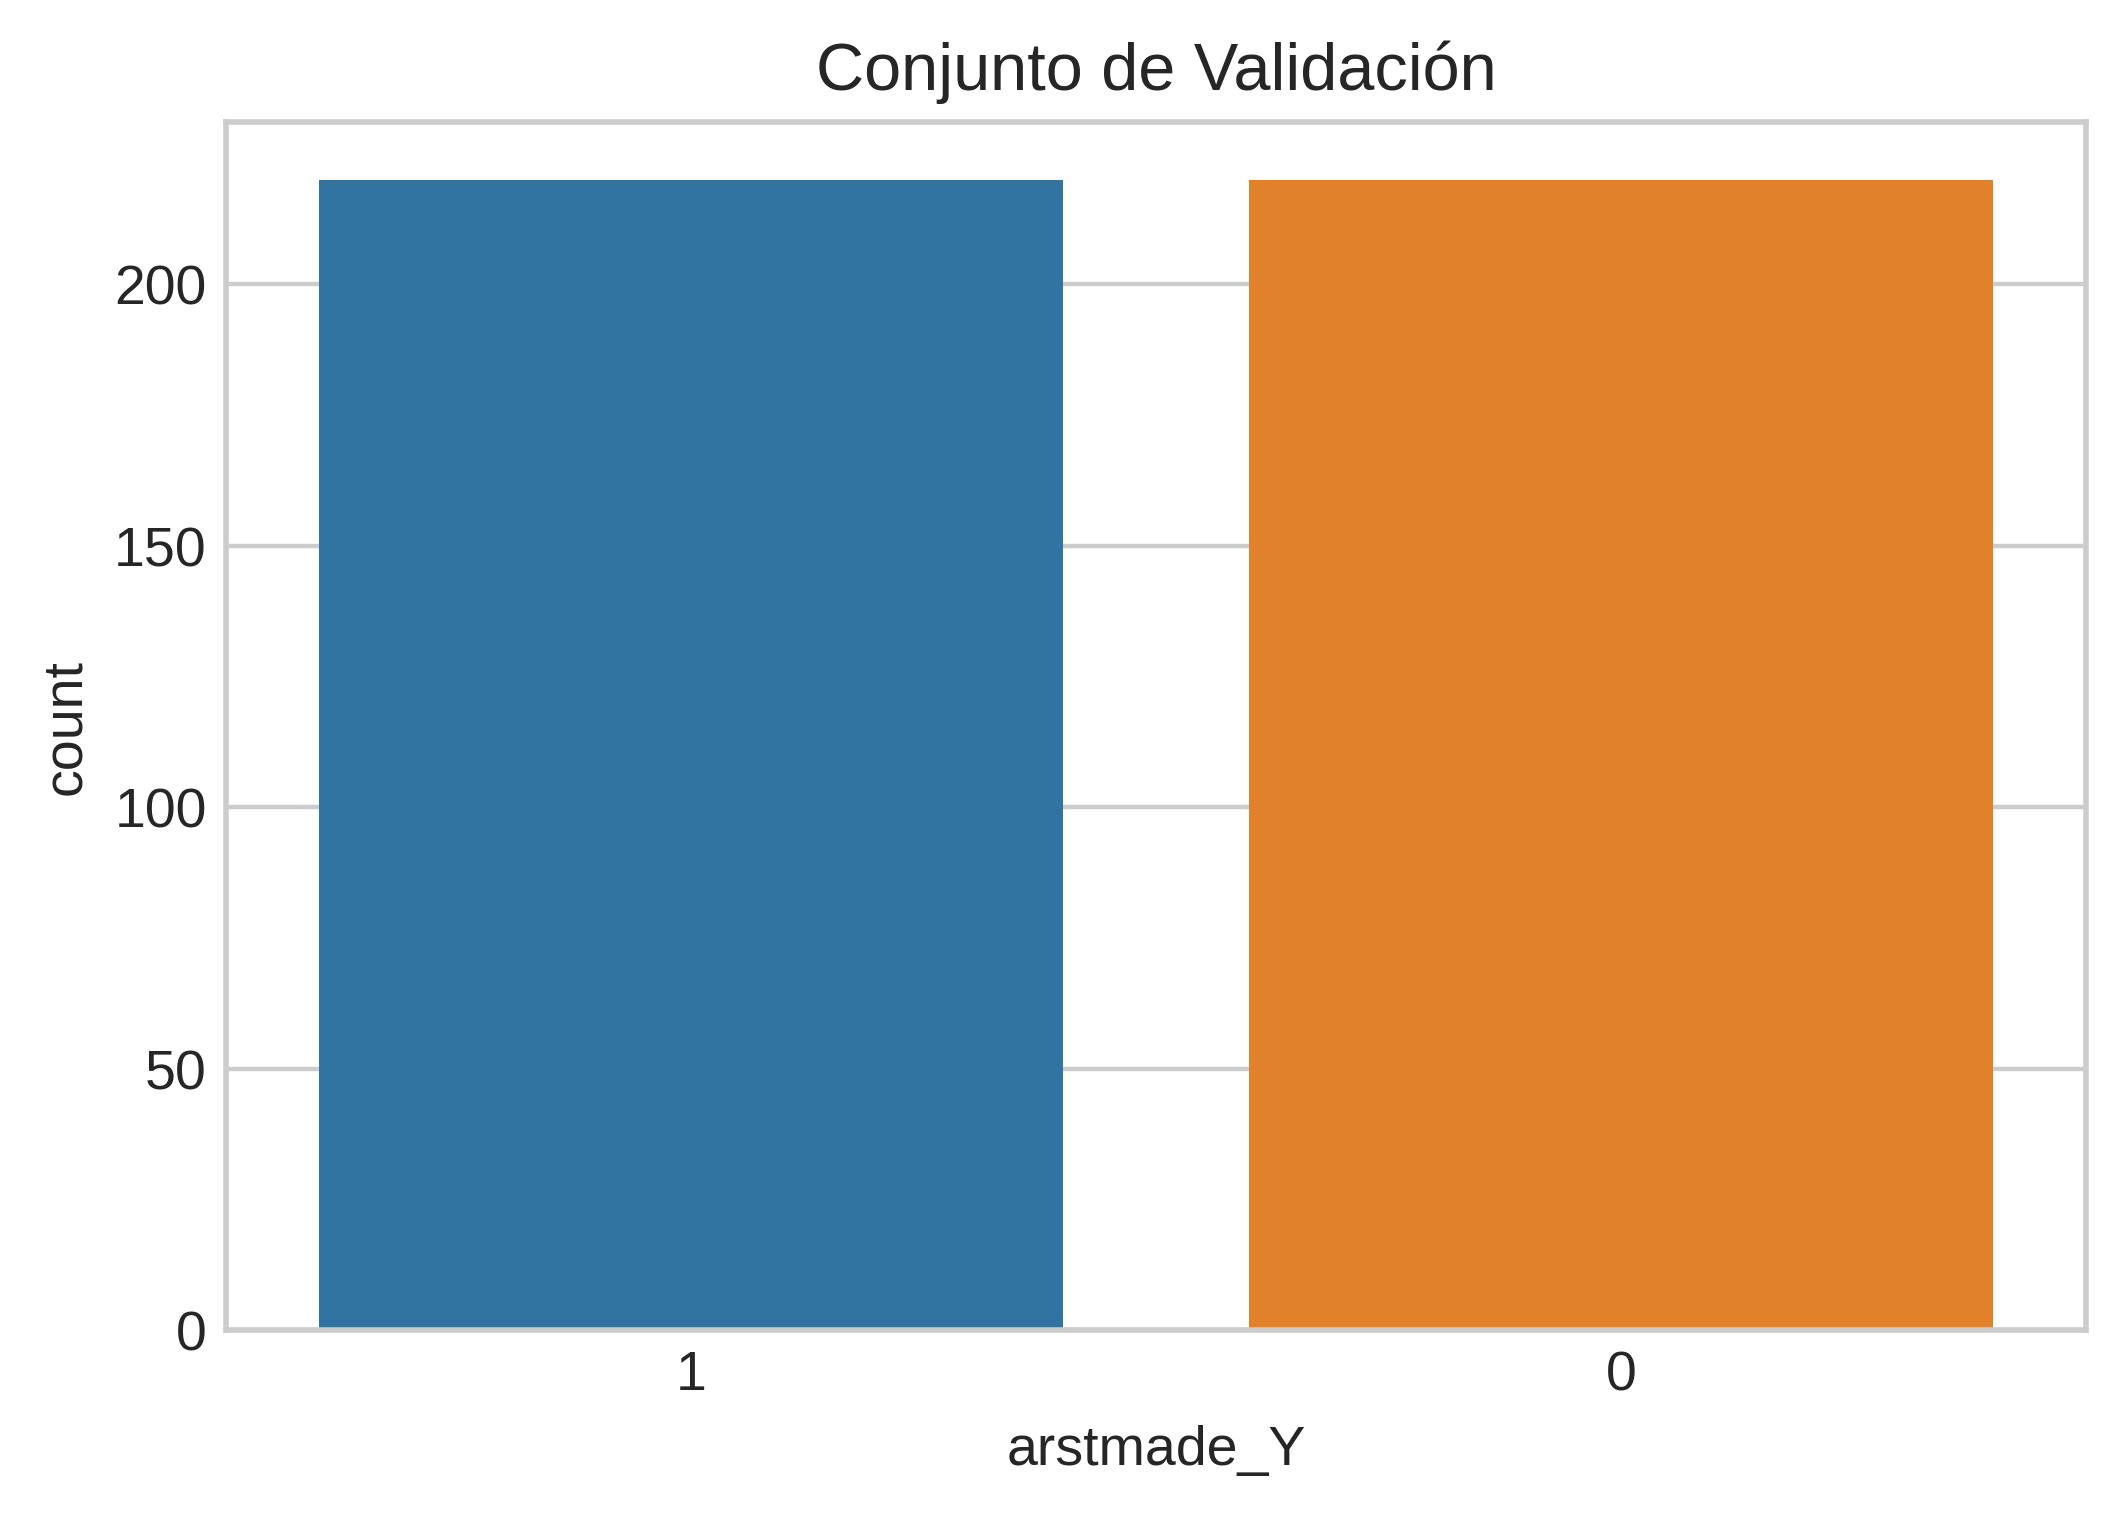

In [149]:
# Se comprueba que el conjunto de Validación esté BALANCEADO
print(y_test.value_counts())
plt.title("Conjunto de Validación")
sns.countplot(y_test, order = y_test.value_counts().index);

In [150]:
# Se normaliza la muestra de atributos
scaler = StandardScaler().fit(X_train)
X_train_scaled = pd.DataFrame(scaler.transform(X_train), columns=X.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X.columns)

__COMENTARIO__

<div class = "pull-left" style="color:blue"> 

Se evaluarán las métricas de modelos que funcionan bien con un problema de clasificación con implementaciones vanilla: __Regresión Logística__, __Support Vector Machine__, __Random Forest__, __Gradient Boosting__ y __XGBOOST__. En base a los resultados se eliminarán las variables menos representativas del modelo, y ya con esta nueva data se hará un análisis exhaustivo con GridSearch los 5 modelos anteriores.

Cabe destacar que solo se estandarizó para los modelos de Regresión Logística y Support Vector Machine, ya que es un requisito para aplicar el procedimiento (de lo contrario se entregaban R2 negativos)

<i><h3 style="text-align:center;color:#FFFFF"> Regresión Logística</h3></i>

In [151]:
# Entreno modelo Regresión Logística
modelo_log_regre = LogisticRegression(random_state=18273).fit(X_train_scaled, y_train)

In [152]:
y_hat_log_regre = modelo_log_regre.predict(X_test_scaled)

In [153]:
# Métricas de desempeño
print(classification_report(y_test, y_hat_log_regre))

              precision    recall  f1-score   support

           0       0.72      0.99      0.84       220
           1       0.99      0.62      0.76       220

    accuracy                           0.81       440
   macro avg       0.85      0.81      0.80       440
weighted avg       0.85      0.81      0.80       440



<i><h3 style="text-align:center;color:#FFFFF"> Support Vector Machine</h3></i>

In [154]:
modelo_SVM = SVC(random_state=18273).fit(X_train_scaled, y_train)

In [155]:
y_hat_svm = modelo_SVM.predict(X_test_scaled)

In [156]:
# Métricas de desempeño
print(classification_report(y_test, y_hat_svm))

              precision    recall  f1-score   support

           0       0.66      1.00      0.79       220
           1       0.99      0.48      0.64       220

    accuracy                           0.74       440
   macro avg       0.82      0.74      0.72       440
weighted avg       0.82      0.74      0.72       440



<i><h3 style="text-align:center;color:#FFFFF"> Random Forest</h3></i>

In [157]:
# genero un nuevo modelo de Random Forest
random_forest = RandomForestClassifier(random_state=18273).fit(X_train, y_train)

In [158]:
y_hat_forest = random_forest.predict(X_test)

In [159]:
# Métricas de desempeño
print(classification_report(y_test, y_hat_forest))

              precision    recall  f1-score   support

           0       0.69      0.99      0.82       220
           1       0.98      0.56      0.72       220

    accuracy                           0.78       440
   macro avg       0.84      0.78      0.77       440
weighted avg       0.84      0.78      0.77       440



<i><h3 style="text-align:center;color:#FFFFF"> Gradient Boosting</h3></i>

In [160]:
# genero un nuevo modelo de Boosting
modelo_boost = GradientBoostingClassifier(random_state=18273).fit(X_train, y_train)

In [161]:
# Predicción pruebas
y_hat_gradient = modelo_boost.predict(X_test)

In [162]:
# Métricas de desempeño
print(classification_report(y_test, y_hat_gradient))

              precision    recall  f1-score   support

           0       0.74      0.98      0.84       220
           1       0.97      0.65      0.78       220

    accuracy                           0.82       440
   macro avg       0.85      0.82      0.81       440
weighted avg       0.85      0.82      0.81       440



<i><h3 style="text-align:center;color:#FFFFF"> XG BOOST</h3></i>

In [163]:
model_xgb = XGBClassifier().fit(X_train, y_train)

In [164]:
# Predicción pruebas
y_hat_xgboost = model_xgb.predict(X_test)

In [165]:
# Métricas de desempeño
print(classification_report(y_test, y_hat_xgboost))

              precision    recall  f1-score   support

           0       0.73      0.99      0.84       220
           1       0.98      0.63      0.76       220

    accuracy                           0.81       440
   macro avg       0.85      0.81      0.80       440
weighted avg       0.85      0.81      0.80       440



In [166]:
print("Accuracy Reg Log: ", round(accuracy_score(y_hat_log_regre, y_test),5))
print("Accuracy SVM: ", round(accuracy_score(y_hat_svm, y_test),5))
print("Accuracy Random Forest: ", round(accuracy_score(y_hat_forest, y_test),5))
print("Accuracy Gradient Bossting: ", round(accuracy_score(y_hat_gradient, y_test),5))
print("Accuracy XG Boost: ", round(accuracy_score(y_hat_xgboost, y_test),5))

Accuracy Reg Log:  0.80682
Accuracy SVM:  0.73636
Accuracy Random Forest:  0.77727
Accuracy Gradient Bossting:  0.81591
Accuracy XG Boost:  0.80682


In [167]:
print("F1 0 Reg Log: ", round(f1_score(y_hat_log_regre, y_test, pos_label = 0 ),5))
print("F1 0 SVM: ", round(f1_score(y_hat_svm, y_test, pos_label = 0 ),5))
print("F1 0 Random Forest: ", round(f1_score(y_hat_forest, y_test, pos_label = 0 ),5))
print("F1 0 Gradient Bossting: ", round(f1_score(y_hat_gradient, y_test, pos_label = 0 ),5))
print("F1 0 XG Boost: ", round(f1_score(y_hat_xgboost, y_test, pos_label = 0 ),5))

F1 0 Reg Log:  0.83685
F1 0 SVM:  0.79061
F1 0 Random Forest:  0.81648
F1 0 Gradient Bossting:  0.84211
F1 0 XG Boost:  0.83622


In [168]:
print("F1 1 Reg Log: ", round(f1_score(y_hat_log_regre, y_test),5))
print("F1 1 SVM: ", round(f1_score(y_hat_svm, y_test),5))
print("F1 1 Random Forest: ", round(f1_score(y_hat_forest, y_test),5))
print("F1 1 Gradient Bossting: ", round(f1_score(y_hat_gradient, y_test),5))
print("F1 1 XG Boost: ", round(f1_score(y_hat_xgboost, y_test),5))

F1 1 Reg Log:  0.76323
F1 1 SVM:  0.64417
F1 1 Random Forest:  0.71676
F1 1 Gradient Bossting:  0.77929
F1 1 XG Boost:  0.76454


__COMENTARIO__

<div class = "pull-left" style="color:blue"> 

En base a los resultados, se elegirá __Gradient Boosting__ para analizar la importancia de los atributos, ya que tiene un mayor valor de __accuracy__ y __f1 score__ tanto para 0 y 1.

In [169]:
# Función plot_importance
def plot_importance(fit_model, feat_names, title='Feature importance'):
    tmp_importance = fit_model.feature_importances_
    sort_importances = np.argsort(tmp_importance)[::-1]
    names = [feat_names[i] for i in sort_importances]
    plt.title(title)
    plt.barh(range(len(feat_names)), tmp_importance[sort_importances])
    plt.yticks(range(len(feat_names)), names, rotation=0)
    return pd.DataFrame({'atributo':names, 'importancia':tmp_importance[sort_importances]})

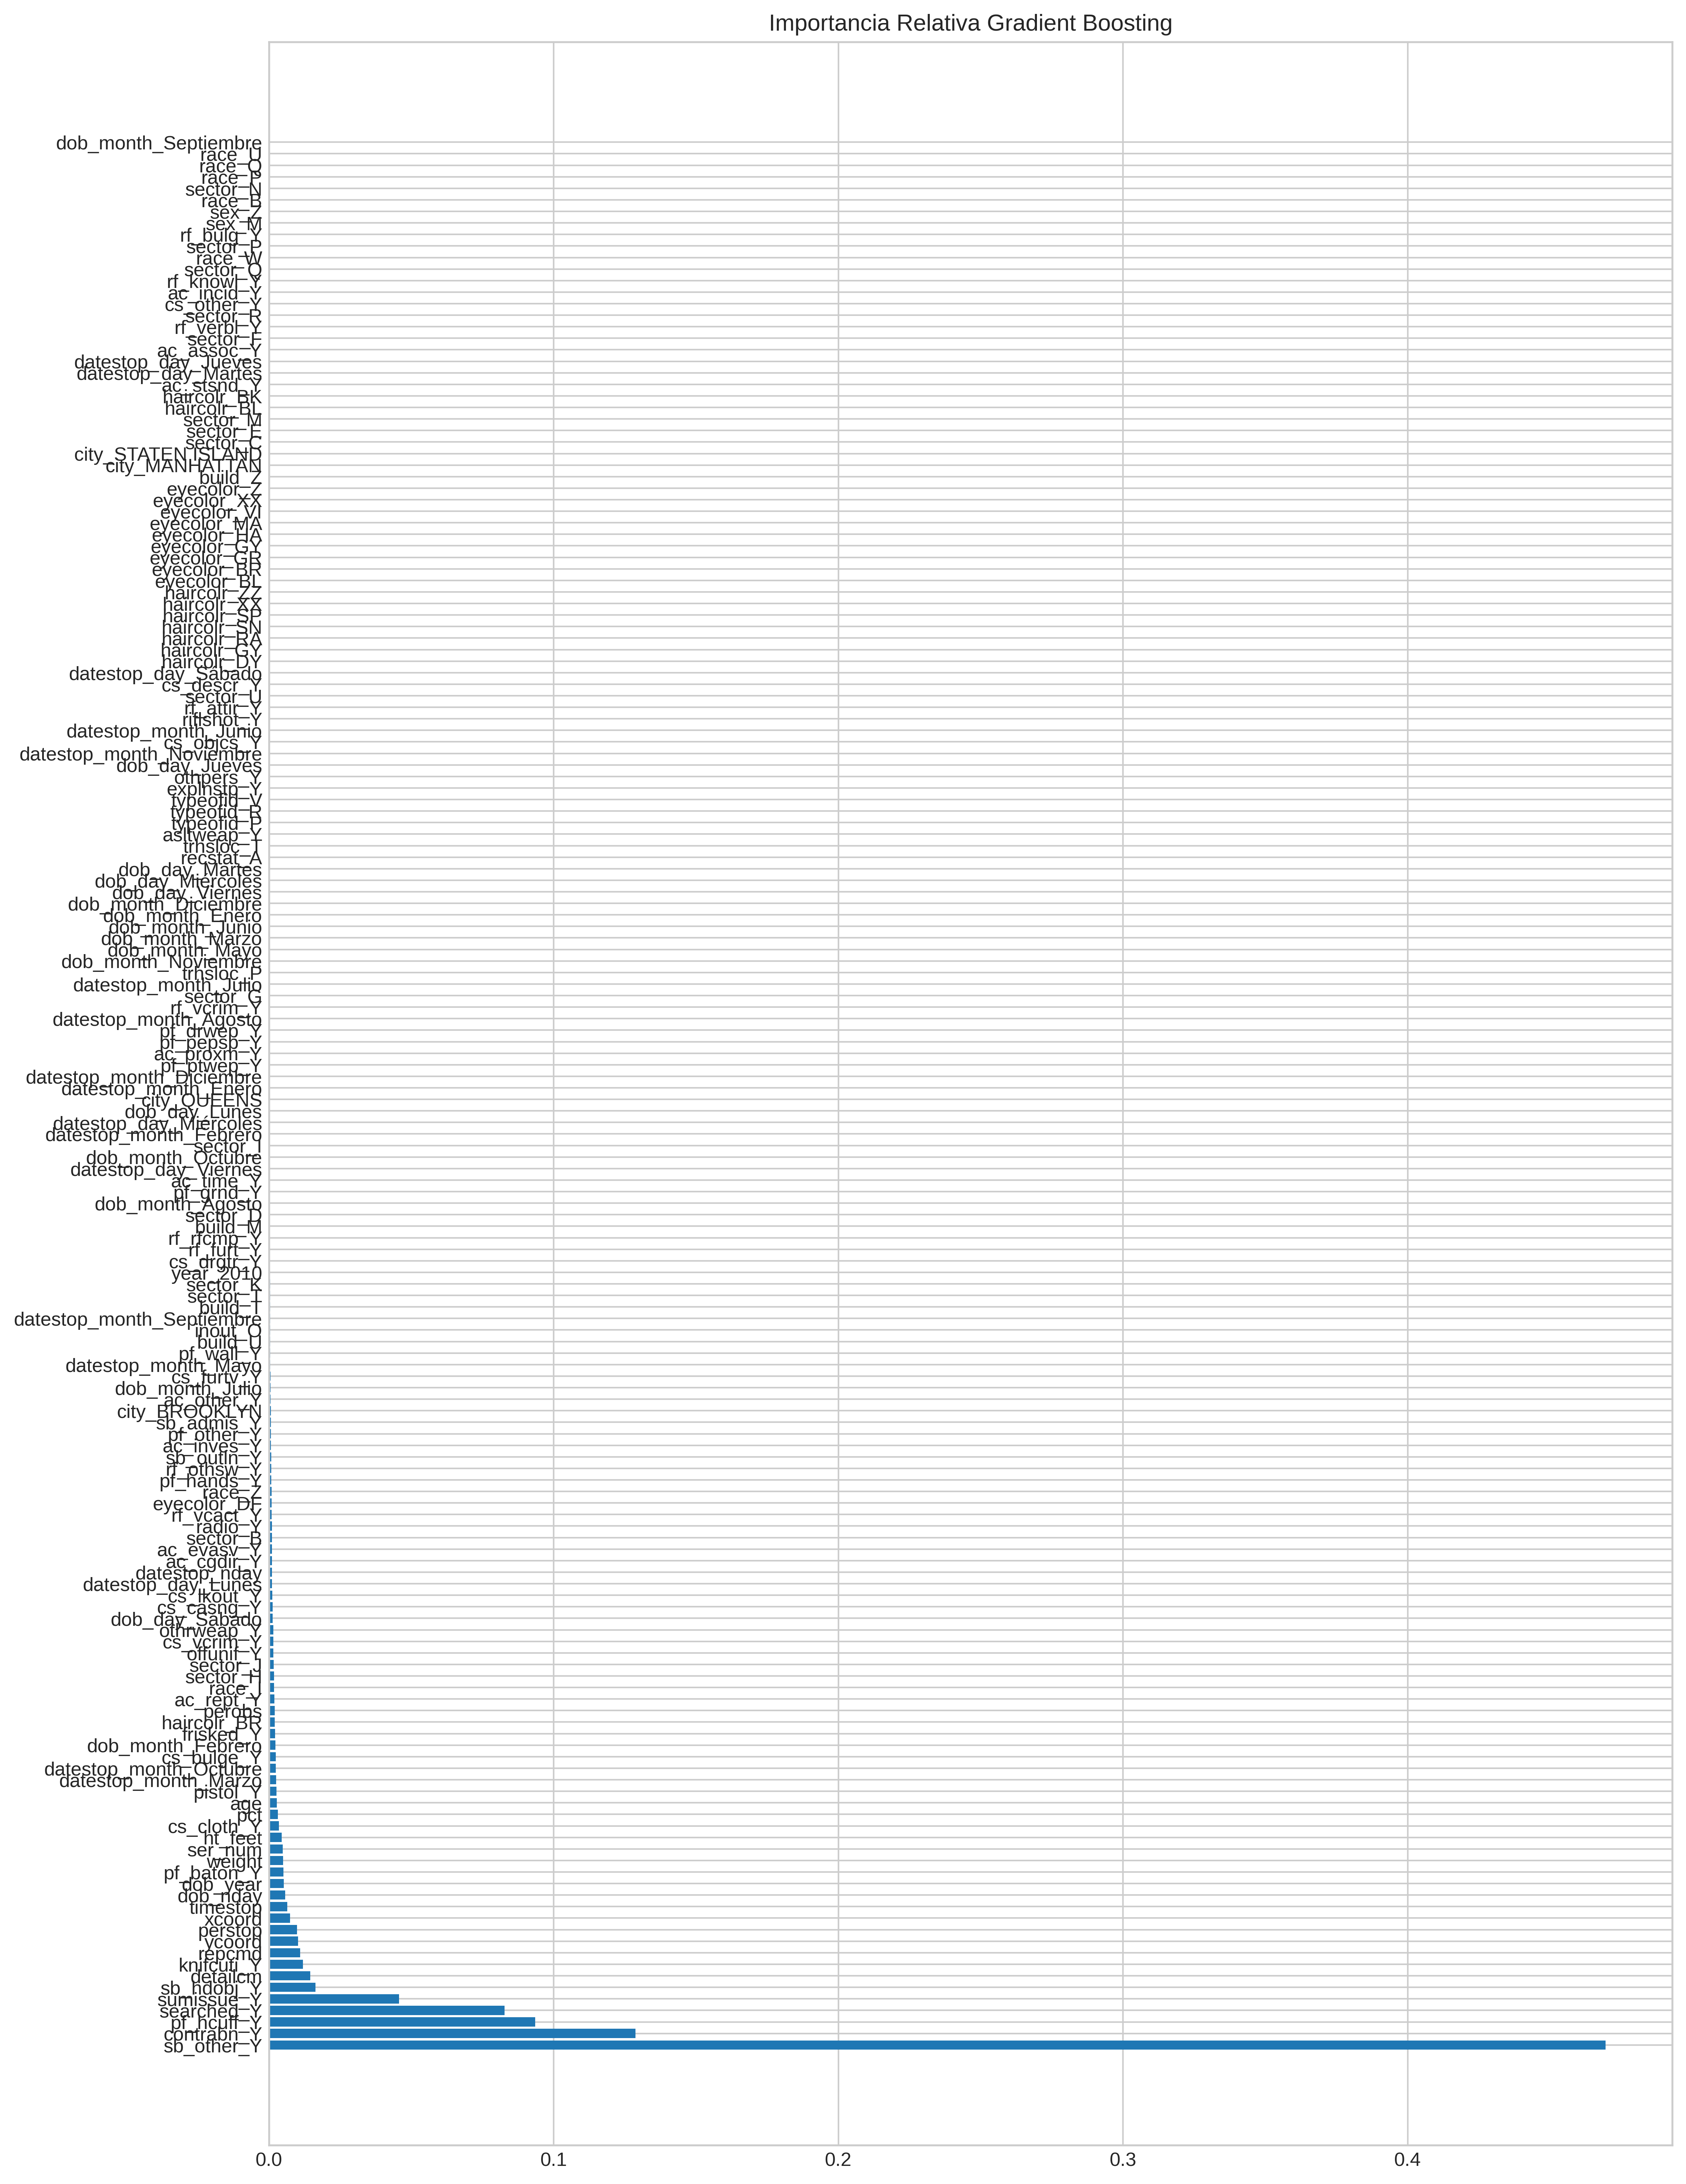

In [170]:
# Con esta función podemos ver cuales son los atributos que más influyen en el vector objetivo
plt.style.use('seaborn-whitegrid')
plt.rcParams["figure.figsize"] = (13,20)
plt.rcParams["figure.dpi"] = 400
plot_importance_df = plot_importance(modelo_boost,
                                    list(X.columns), 
                                    'Importancia Relativa Gradient Boosting')

In [171]:
# En base a los resultados se eligen las 40 primeras columnas (25% aprox de los atributos originales)
columnas = X.columns
df_importante = pd.DataFrame({'atributo':columnas, 'importance':modelo_boost.feature_importances_}).sort_values(by='importance', ascending=False)
df_importante = df_importante[:40]
df_importante

atributo  importance
71               sb_other_Y    0.469497
25               contrabn_Y    0.128674
37               pf_hcuff_Y    0.093441
24               searched_Y    0.082749
21               sumissue_Y    0.045597
68               sb_hdobj_Y    0.016352
11                 detailcm    0.014396
29               knifcuti_Y    0.011866
5                    repcmd    0.010909
10                   ycoord    0.010160
4                   perstop    0.009761
9                    xcoord    0.007380
2                  timestop    0.006337
130                dob_nday    0.005707
131                dob_year    0.005172
36               pf_baton_Y    0.005024
8                    weight    0.004915
1                   ser_num    0.004754
7                   ht_feet    0.004422
52               cs_cloth_Y    0.003422
0                       pct    0.003046
6                       age    0.002767
26                 pistol_Y    0.002536
144    datestop_month_Marzo    0.002413
147  datestop_month_Octubre    0.002389
61               cs_bulge_Y    0.002319
158       dob_month_Febrero    0.002281
23                frisked_Y    0.002133
85              haircolr_BR    0.001997
3                    perobs    0.001933
41                ac_rept_Y    0.001906
77                   race_I    0.001794
117                sector_H    0.001699
119                sector_J    0.001672
22                offunif_Y    0.001498
60               cs_vcrim_Y    0.001489
30               othrweap_Y    0.001489
153          dob_day_Sábado    0.001292
49               cs_casng_Y    0.001185
50               cs_lkout_Y    0.001149

In [172]:
# Se pasa a objeto los atributos
atributos = list(df_importante.atributo)

In [173]:
# Se modifican las variables X correspondientes
X_train_2 = X_train.loc[:,atributos]
X_test_2 = X_test.loc[:,atributos]
X_train_scaled_2 = X_train_scaled.loc[:,atributos]
X_test_scaled_2 = X_test_scaled.loc[:,atributos]

In [174]:
atributos[:5]

['sb_other_Y', 'contrabn_Y', 'pf_hcuff_Y', 'searched_Y', 'sumissue_Y']

__COMENTARIO__

<div class = "pull-left" style="color:blue"> 

Se determina que los 5 mejores atributos para los modelos son: 
* sb_other_Y: BASIS OF SEARCH - OTHER (YES)
* contrabn_Y: WAS CONTRABAND FOUND ON SUSPECT ? (YES)
* pf_hcuff_Y: PHYSICAL FORCE USED BY OFFICER - HANDCUFFS (YES)
* searched_Y: WAS SUSPECT SEARCHED ? (YES)
* sumissue_Y: WAS A SUMMONS ISSUED ? (YES)

__COMENTARIO__

<div class = "pull-left" style="color:blue"> 

Ahora se empezará el GridSearch de los modelos para escoger el mejor.

<i><h3 style="text-align:center;color:#FFFFF"> GridSearch Regresión Logística</h3></i>

In [175]:
# Por defecto es lo mismo que al entrenarlo
modelo_log_regre_2 = LogisticRegression(random_state=18273).fit(X_train_scaled_2, y_train)

In [176]:
# Predicción pruebas
y_hat_log_regre_2 = modelo_log_regre_2.predict(X_test_scaled_2)

In [177]:
# Métricas de desempeño
print(classification_report(y_test, y_hat_log_regre_2))

              precision    recall  f1-score   support

           0       0.74      0.99      0.84       220
           1       0.98      0.65      0.78       220

    accuracy                           0.82       440
   macro avg       0.86      0.82      0.81       440
weighted avg       0.86      0.82      0.81       440



In [178]:
# Guardamos en variables las métricas
acc_reglog = round(accuracy_score(y_hat_log_regre_2, y_test),5)
f1_0_reglog = round(f1_score(y_hat_log_regre_2, y_test, pos_label = 0 ),5)
f1_1_reglog = round(f1_score(y_hat_log_regre_2, y_test),5)

<i><h3 style="text-align:center;color:#FFFFF"> GridSearch Support Vector Machine</h3></i>

In [179]:
# Definimos los parámetros para la búsqueda de grilla
params_msv_grid = {'C' : [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
              'gamma' : [0.0000001, 0.0001, 0.001, 0.01, 0.1, 1, 10], 'kernel' : ['rbf']}
modelo_SVM_2 = GridSearchCV(SVC(random_state=18273),
                              param_grid=params_msv_grid,
                              cv=5, n_jobs=-1,verbose=2).fit(X_train_scaled_2, y_train)

Fitting 5 folds for each of 56 candidates, totalling 280 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:    5.3s


KeyboardInterrupt: ignored

In [ ]:
# Consulto los mejores parámetros
modelo_SVM_2.best_params_

In [ ]:
# Predicción pruebas
y_hat_svm_2 = modelo_SVM_2.best_estimator_.predict(X_test_scaled_2)

In [ ]:
# Métricas de desempeño
print(classification_report(y_test, y_hat_svm_2))

In [ ]:
# Guardamos en variables las métricas
acc_svm = round(accuracy_score(y_hat_svm_2, y_test),5)
f1_0_svm = round(f1_score(y_hat_svm_2, y_test, pos_label = 0 ),5)
f1_1_svm = round(f1_score(y_hat_svm_2, y_test),5)

<i><h3 style="text-align:center;color:#FFFFF"> GridSearch Random Forest</h3></i>

In [ ]:
params_rf_grid = {
    'n_estimators' : [100,200,300,400,500],
    'max_features' : [None, 'log2', 'sqrt']
}
random_forest_2 = GridSearchCV(RandomForestClassifier(random_state=18273),
                              param_grid=params_rf_grid,
                              cv=5, n_jobs=-1,verbose=2).fit(X_train_2, y_train)

In [ ]:
# Consulto los mejores parámetros
random_forest_2.best_params_

In [ ]:
# Predicción pruebas
y_hat_forest_2 = random_forest_2.best_estimator_.predict(X_test_2)

In [ ]:
# Métricas de desempeño
print(classification_report(y_test, y_hat_forest_2))

In [ ]:
# Guardamos en variables las métricas
acc_forest = round(accuracy_score(y_hat_forest_2, y_test),5)
f1_0_forest = round(f1_score(y_hat_forest_2, y_test, pos_label = 0 ),5)
f1_1_forest = round(f1_score(y_hat_forest_2, y_test),5)

<i><h3 style="text-align:center;color:#FFFFF"> GridSearch Gradient Boosting</h3></i>

In [ ]:
# Gridsearch Boosting
param_gradient = {'learning_rate': [0.01, 0.1, 0.5], 'n_estimators': [50, 100, 500, 1000, 2000], 'subsample': [0.1,0.5,0.9]}
modelo_boost_2 = GridSearchCV(GradientBoostingClassifier(random_state=18273),
                              param_grid=param_gradient,
                              cv=5, n_jobs=-1,verbose=2).fit(X_train_2, y_train)

In [ ]:
# Consulto los mejores parámetros
modelo_boost_2.best_params_

In [ ]:
# Predicción pruebas
y_hat_gradient_2 = modelo_boost_2.best_estimator_.predict(X_test_2)

In [ ]:
# Métricas de desempeño
print(classification_report(y_test, y_hat_gradient_2))

In [ ]:
# Guardamos en variables las métricas
acc_gradient = round(accuracy_score(y_hat_gradient_2, y_test),5)
f1_0_gradient = round(f1_score(y_hat_gradient_2, y_test, pos_label = 0 ),5)
f1_1_gradient = round(f1_score(y_hat_gradient_2, y_test),5)

<i><h3 style="text-align:center;color:#FFFFF"> GridSearch XG Boost</h3></i>

In [ ]:
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }
model_xgb_2 = GridSearchCV(XGBClassifier(),
                              param_grid=params,
                              cv=5, n_jobs=-1,verbose=2).fit(X_train_2, y_train)

In [ ]:
# Consulto los mejores parámetros
model_xgb_2.best_params_

In [ ]:
# Predicción pruebas
y_hat_xgboost_2 = model_xgb_2.best_estimator_.predict(X_test_2)

In [ ]:
# Métricas de desempeño
print(classification_report(y_test, y_hat_xgboost_2))

In [ ]:
# Guardamos en variables las métricas
acc_xgboost = round(accuracy_score(y_hat_xgboost_2, y_test),5)
f1_0_xgboost = round(f1_score(y_hat_xgboost_2, y_test, pos_label = 0 ),5)
f1_1_xgboost = round(f1_score(y_hat_xgboost_2, y_test),5)

In [ ]:
# Se crea un Dataset con las métricas de los distintos modelos
models = pd.DataFrame({
    "Modelo":["Regresión Logística","Support Vector Machine","Random Forest","Gradient Boosting","XGBoost"],
    "Accuracy":[acc_reglog,acc_svm,acc_forest,acc_gradient,acc_xgboost],
    "F1 0":[f1_0_reglog,f1_0_svm,f1_0_forest,f1_0_gradient,f1_0_xgboost],
    "F1 1":[f1_1_reglog,f1_1_svm,f1_1_forest,f1_1_gradient,f1_1_xgboost]
})
models.sort_values(by="Accuracy",ascending = False)

__COMENTARIO__

<div class = "pull-left" style="color:blue"> 

En conclusión, el mejor modelo es el __Gradient Boosting__ ya que tiene los valores más altos en:
* Accuracy: 82%
* F1 score para 0: 84.5%
* F1 score para 1: 78.6%

## Ejercicio 4
Genere al menos cinco modelos predictivos que permitan determinar si el procedimiento policial concluirá en alguna acción violenta.
+ Para ello, debe generar un nuevo atributo como vector objetivo que indique cuándo hubo violencia o no. Éste debe ser creado a partir de atributos existentes que indiquen el tipo de violencia.

In [ ]:
# Se identifican aquellas variables que son de carácter violentas POR PARTE DEL OFICIAL
pfs = df_binarizado_3.filter(regex='^pf_', axis=1)
print(pfs.shape)
pfs.tail(5)

In [ ]:
# También se identifican aquellas variables que son de carácter violentas POR PARTE DEL IMPLICADO
violence_asault = df_binarizado_3.filter(regex=re.compile("vcrim|vcact"), axis=1)
print(violence_asault.shape)
violence_asault.sample(5)

In [ ]:
# Se juntan las 2 variables de violencia
violence = pd.concat([pfs,violence_asault],axis=1)
print(violence.shape)
violence.sample(5)

__COMENTARIO__

<div class = "pull-left" style="color:blue"> 
    
Se creará una nueva variable que englobe las 12 variables antes señaladas. Se sumarán todos sus valores que podrían ser 0 o 1, y se determinará que aquel resultado que sea mayor a 1 es definitivamente un arresto que tuvo violencia. Esta nueva variable será binaria cuyo valor 1 corresponderá a un acto con cualquier tipo de violencia.

In [ ]:
# Se crea un objetivo con la suma de las variables anteriores y se define como 1 las violentas
violence_sum = violence.sum(axis=1)
violence_sum = pd.DataFrame(violence_sum,columns = ["Violencia_bin"])
violence_sum['Violencia_bin'] = np.where(violence_sum['Violencia_bin'] > 0, 1, 0)
violence_sum.sample(5)

In [ ]:
# Revisamos el vector objetivo para una acción violenta
plt.rcParams['figure.figsize']=(10, 6)
print(round(violence_sum['Violencia_bin'].value_counts('%'),2))
sns.countplot(violence_sum['Violencia_bin']);

__COMENTARIO__

<div class = "pull-left" style="color:blue"> 
    
Se aprecia que el vector objetivo de una acción violenta está un poco más balanceada con un 37% que considera que el evento sí tuvo alguna acción violenta. De todas formas se considera que sí está desbalanceado.

In [ ]:
# Se eliminan las 12 variables de violencia
df_binarizado_4 = df_binarizado_3.drop(columns=list(violence.columns))

In [ ]:
# Se añade el vector objetivo "Violencia_bin"
df_binarizado_4 = pd.concat([df_binarizado_4,violence_sum],axis=1)
print(df_binarizado_4.shape)
df_binarizado_4.head()

__COMENTARIO__

<div class = "pull-left" style="color:blue"> 
    
El nuevo dataset me queda de 156 atributos y 11090 registros
    
Se repite el mismo procedimiento que el ejercicio 3

In [ ]:
# Revisamos el vector objetivo para una acción violenta junto con el anterior vector objetivo arstmade_Y
plt.rcParams['figure.figsize']=(10, 6)
sns.countplot(df_binarizado_4['Violencia_bin'],hue = df_binarizado_4['arstmade_Y']);

__COMENTARIO ANALISIS EXTRA__

<div class = "pull-left" style="color:blue"> 
    
De manera extra, se ve que no necesariamente un arresto conlleva violencia, ya que la cantidad de arrestos es bastante similar entre si hubo violencia o no. 

In [ ]:
# Se separa la muestra total
X_4 = df_binarizado_4.drop(columns='Violencia_bin')
y_4 = df_binarizado_4['Violencia_bin']
X_train_4, X_test_pre_4, y_train_4, y_test_pre_4 = train_test_split(X_4, y_4, test_size = 0.33, random_state = 18273)

In [ ]:
# Comprobar la data desbalanceada en el conjunto de validación
print(y_test_pre_4.value_counts())
plt.figure(figsize=(12,5)) 
plt.title("Conjunto de Validación")
sns.countplot(y_test_pre_4, order = y_test_pre_4.value_counts().index);

In [ ]:
# Porcentaje a utilizar para obtener 220 registros 0 en validación
round(1333*100/2327,7)

__COMENTARIO__

<div class = "pull-left" style="color:blue"> 
    
Se comprueba que la muestra de validación esta desbalanceada. Se buscarán 1333 muestras de 0 para juntarlas con las 1333 de 1 para que esté balanceado. Cabe destacar que los 0 que se saquen NO entrarán al conjunto de entrenamiento para no desbalancear más ese conjunto. El porcentaje que se aplicará será 57.2840567 para obtener 1333 de 2327 registros.

In [ ]:
# Se concatena x e y test para tener el conjunto
df_concat_test_4 = pd.concat([X_test_pre_4,y_test_pre_4],axis=1)
print(df_concat_test_4.shape)
df_concat_test_4.head()

In [ ]:
# Se sacan solo los 0
ceros_4 = df_concat_test_4[df_concat_test_4.Violencia_bin == 0]
# Se separa la muestra
X_ceros_4 = ceros_4.drop(columns='Violencia_bin')
y_ceros_4 = ceros_4['Violencia_bin']
X_fuera_4, X_test_ceros_4, y_fuera_4, y_test_ceros_4 = train_test_split(X_ceros_4, y_ceros_4, test_size = 0.572840567, random_state = 18273)
# Tener los 1 anteriores
unos_4 = df_concat_test_4[df_concat_test_4.Violencia_bin == 1]
X_test_unos_4 = unos_4.drop(columns='Violencia_bin')
y_test_unos_4 = unos_4['Violencia_bin']
# Se concatenan los 0 con los 1 para finalmente obtener los conjuntos de validación balanceados
X_test_4 = pd.concat([X_test_unos_4,X_test_ceros_4])
y_test_4 = pd.concat([y_test_unos_4,y_test_ceros_4])
y_test_4.shape

In [ ]:
# Se comprueba que el conjunto de Validación esté BALANCEADO
print(y_test_4.value_counts())
plt.figure(figsize=(12,5)) 
plt.title("Conjunto de Validación")
sns.countplot(y_test_4, order = y_test_4.value_counts().index);

In [ ]:
# Se normaliza la muestra de atributos
scaler_4 = StandardScaler().fit(X_train_4)
X_train_scaled_4 = pd.DataFrame(scaler_4.transform(X_train_4), columns=X_4.columns)
X_test_scaled_4 = pd.DataFrame(scaler_4.transform(X_test_4), columns=X_4.columns)

__COMENTARIO__

<div class = "pull-left" style="color:blue"> 

Se evaluarán las métricas de modelos que funcionan bien con un problema de clasificación con implementaciones vanilla: __Regresión Logística__, __Support Vector Machine__, __Random Forest__, __Gradient Boosting__ y __XGBOOST__. En base a los resultados se eliminarán las variables menos representativas del modelo, y ya con esta nueva data se hará un análisis exhaustivo con GridSearch los 5 modelos anteriores.

Cabe destacar que solo se estandarizó para los modelos de Regresión Logística y Support Vector Machine, ya que es un requisito para aplicar el procedimiento (de lo contrario se entregaban R2 negativos)

<i><h3 style="text-align:center;color:#FFFFF"> Regresión Logística</h3></i>

In [ ]:
# Entreno modelo Regresión Logística
modelo_log_regre_4 = LogisticRegression(random_state=18273).fit(X_train_scaled_4, y_train_4)

In [ ]:
y_hat_log_regre_4 = modelo_log_regre_4.predict(X_test_scaled_4)

In [ ]:
# Métricas de desempeño
print(classification_report(y_test_4, y_hat_log_regre_4))

<i><h3 style="text-align:center;color:#FFFFF"> Support Vector Machine</h3></i>

In [ ]:
modelo_SVM_4 = SVC(random_state=18273).fit(X_train_scaled_4, y_train_4)

In [ ]:
y_hat_svm_4 = modelo_SVM_4.predict(X_test_scaled_4)

In [ ]:
# Métricas de desempeño
print(classification_report(y_test_4, y_hat_svm_4))

<i><h3 style="text-align:center;color:#FFFFF"> Random Forest</h3></i>

In [ ]:
# genero un nuevo modelo de Random Forest
random_forest_4 = RandomForestClassifier(random_state=18273).fit(X_train_4, y_train_4)

In [ ]:
y_hat_forest_4 = random_forest_4.predict(X_test_4)

In [ ]:
# Métricas de desempeño
print(classification_report(y_test_4, y_hat_forest_4))

<i><h3 style="text-align:center;color:#FFFFF"> Gradient Boosting</h3></i>

In [ ]:
# genero un nuevo modelo de Boosting
modelo_boost_4 = GradientBoostingClassifier(random_state=18273).fit(X_train_4, y_train_4)

In [ ]:
# Predicción pruebas
y_hat_gradient_4 = modelo_boost_4.predict(X_test_4)

In [ ]:
# Métricas de desempeño
print(classification_report(y_test_4, y_hat_gradient_4))

<i><h3 style="text-align:center;color:#FFFFF"> XG BOOST</h3></i>

In [ ]:
model_xgb_4 = XGBClassifier().fit(X_train_4, y_train_4)

In [ ]:
# Predicción pruebas
y_hat_xgboost_4 = model_xgb_4.predict(X_test_4)

In [ ]:
# Métricas de desempeño
print(classification_report(y_test_4, y_hat_xgboost_4))

In [ ]:
print("Accuracy Reg Log: ", round(accuracy_score(y_hat_log_regre_4, y_test_4),5))
print("Accuracy SVM: ", round(accuracy_score(y_hat_svm_4, y_test_4),5))
print("Accuracy Random Forest: ", round(accuracy_score(y_hat_forest_4, y_test_4),5))
print("Accuracy Gradient Bossting: ", round(accuracy_score(y_hat_gradient_4, y_test_4),5))
print("Accuracy XG Boost: ", round(accuracy_score(y_hat_xgboost_4, y_test_4),5))

In [ ]:
print("F1 0 Reg Log: ", round(f1_score(y_hat_log_regre_4, y_test_4, pos_label = 0 ),5))
print("F1 0 SVM: ", round(f1_score(y_hat_svm_4, y_test_4, pos_label = 0 ),5))
print("F1 0 Random Forest: ", round(f1_score(y_hat_forest_4, y_test_4, pos_label = 0 ),5))
print("F1 0 Gradient Bossting: ", round(f1_score(y_hat_gradient_4, y_test_4, pos_label = 0 ),5))
print("F1 0 XG Boost: ", round(f1_score(y_hat_xgboost_4, y_test_4, pos_label = 0 ),5))

In [ ]:
print("F1 1 Reg Log: ", round(f1_score(y_hat_log_regre_4, y_test_4),5))
print("F1 1 SVM: ", round(f1_score(y_hat_svm_4, y_test_4),5))
print("F1 1 Random Forest: ", round(f1_score(y_hat_forest_4, y_test_4),5))
print("F1 1 Gradient Bossting: ", round(f1_score(y_hat_gradient_4, y_test_4),5))
print("F1 1 XG Boost: ", round(f1_score(y_hat_xgboost_4, y_test_4),5))

__COMENTARIO__

<div class = "pull-left" style="color:blue"> 

En base a los resultados, se elegirá __Random Forest__ para analizar la importancia de los atributos, ya que en promedio tiene mejores valores entre las 3 métricas.

In [ ]:
# Con esta función podemos ver cuales son los atributos que más influyen en el vector objetivo
plt.style.use('seaborn-whitegrid')
plt.rcParams["figure.figsize"] = (13,20)
plt.rcParams["figure.dpi"] = 400
plot_importance_df = plot_importance(random_forest_4,
                                    list(X_4.columns), 
                                    'Importancia Relativa Random Forest')

In [ ]:
# En base a los resultados se eligen las 40 primeras columnas (25% aprox de los atributos originales)
columnas_4 = X_4.columns
df_importante_4 = pd.DataFrame({'atributo':columnas_4, 'importance':random_forest_4.feature_importances_}).sort_values(by='importance', ascending=False)
df_importante_4 = df_importante_4[:40]
df_importante_4

In [ ]:
# Se pasa a objeto los atributos
atributos_4 = list(df_importante_4.atributo)

In [ ]:
# Se modifican las variables X correspondientes
X_train_4_2 = X_train_4.loc[:,atributos_4]
X_test_4_2 = X_test_4.loc[:,atributos_4]
X_train_scaled_4_2 = X_train_scaled_4.loc[:,atributos_4]
X_test_scaled_4_2 = X_test_scaled_4.loc[:,atributos_4]

__COMENTARIO__

<div class = "pull-left" style="color:blue"> 

Ahora se empezará el GridSearch de los modelos para escoger el mejor.

<i><h3 style="text-align:center;color:#FFFFF"> GridSearch Regresión Logística</h3></i>

In [ ]:
# Por defecto es lo mismo que al entrenarlo
modelo_log_regre_4_2 = LogisticRegression(random_state=18273).fit(X_train_scaled_4_2, y_train_4)

In [ ]:
# Predicción pruebas
y_hat_log_regre_4_2 = modelo_log_regre_4_2.predict(X_test_scaled_4_2)

In [ ]:
# Métricas de desempeño
print(classification_report(y_test_4, y_hat_log_regre_4_2))

In [ ]:
# Guardamos en variables las métricas
acc_reglog_4 = round(accuracy_score(y_hat_log_regre_4_2, y_test_4),5)
f1_0_reglog_4 = round(f1_score(y_hat_log_regre_4_2, y_test_4, pos_label = 0 ),5)
f1_1_reglog_4 = round(f1_score(y_hat_log_regre_4_2, y_test_4),5)

<i><h3 style="text-align:center;color:#FFFFF"> GridSearch Support Vector Machine</h3></i>

In [ ]:
# Definimos los parámetros para la búsqueda de grilla
params_msv_grid = {'C' : [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
              'gamma' : [0.0000001, 0.0001, 0.001, 0.01, 0.1, 1, 10], 'kernel' : ['rbf']}
modelo_SVM_4_2 = GridSearchCV(SVC(random_state=18273),
                              param_grid=params_msv_grid,
                              cv=5, n_jobs=-1,verbose=2).fit(X_train_scaled_4_2, y_train_4)

In [ ]:
# Consulto los mejores parámetros
modelo_SVM_4_2.best_params_

In [ ]:
# Predicción pruebas
y_hat_svm_4_2 = modelo_SVM_4_2.best_estimator_.predict(X_test_scaled_4_2)

In [ ]:
# Métricas de desempeño
print(classification_report(y_test_4, y_hat_svm_4_2))

In [ ]:
# Guardamos en variables las métricas
acc_svm_4 = round(accuracy_score(y_hat_svm_4_2, y_test_4),5)
f1_0_svm_4 = round(f1_score(y_hat_svm_4_2, y_test_4, pos_label = 0 ),5)
f1_1_svm_4 = round(f1_score(y_hat_svm_4_2, y_test_4),5)

<i><h3 style="text-align:center;color:#FFFFF"> GridSearch Random Forest</h3></i>

In [ ]:
params_rf_grid = {
    'n_estimators' : [100,200,300,400,500],
    'max_features' : [None, 'log2', 'sqrt']
}
random_forest_4_2 = GridSearchCV(RandomForestClassifier(random_state=18273),
                              param_grid=params_rf_grid,
                              cv=5, n_jobs=-1,verbose=2).fit(X_train_4_2, y_train_4)

In [ ]:
# Consulto los mejores parámetros
random_forest_4_2.best_params_

In [ ]:
# Predicción pruebas
y_hat_forest_4_2 = random_forest_4_2.best_estimator_.predict(X_test_4_2)

In [ ]:
# Métricas de desempeño
print(classification_report(y_test_4, y_hat_forest_4_2))

In [ ]:
# Guardamos en variables las métricas
acc_forest_4 = round(accuracy_score(y_hat_forest_4_2, y_test_4),5)
f1_0_forest_4 = round(f1_score(y_hat_forest_4_2, y_test_4, pos_label = 0 ),5)
f1_1_forest_4 = round(f1_score(y_hat_forest_4_2, y_test_4),5)

<i><h3 style="text-align:center;color:#FFFFF"> GridSearch Gradient Boosting</h3></i>

In [ ]:
# Gridsearch Boosting
param_gradient = {'learning_rate': [0.01, 0.1, 0.5], 'n_estimators': [50, 100, 500, 1000, 2000], 'subsample': [0.1,0.5,0.9]}
modelo_boost_4_2 = GridSearchCV(GradientBoostingClassifier(random_state=18273),
                              param_grid=param_gradient,
                              cv=5, n_jobs=-1,verbose=2).fit(X_train_4_2, y_train_4)

In [ ]:
# Consulto los mejores parámetros
modelo_boost_4_2.best_params_

In [ ]:
# Predicción pruebas
y_hat_gradient_4_2 = modelo_boost_4_2.best_estimator_.predict(X_test_4_2)

In [ ]:
# Métricas de desempeño
print(classification_report(y_test_4, y_hat_gradient_4_2))

In [ ]:
# Guardamos en variables las métricas
acc_gradient_4 = round(accuracy_score(y_hat_gradient_4_2, y_test_4),5)
f1_0_gradient_4 = round(f1_score(y_hat_gradient_4_2, y_test_4, pos_label = 0 ),5)
f1_1_gradient_4 = round(f1_score(y_hat_gradient_4_2, y_test_4),5)

<i><h3 style="text-align:center;color:#FFFFF"> GridSearch XG Boost</h3></i>

In [ ]:
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }
model_xgb_4_2 = GridSearchCV(XGBClassifier(),
                              param_grid=params,
                              cv=5, n_jobs=-1,verbose=2).fit(X_train_4_2, y_train_4)

In [ ]:
# Consulto los mejores parámetros
model_xgb_4_2.best_params_

In [ ]:
# Predicción pruebas
y_hat_xgboost_4_2 = model_xgb_4_2.best_estimator_.predict(X_test_4_2)

In [ ]:
# Métricas de desempeño
print(classification_report(y_test_4, y_hat_xgboost_4_2))

In [ ]:
# Guardamos en variables las métricas
acc_xgboost_4 = round(accuracy_score(y_hat_xgboost_4_2, y_test_4),5)
f1_0_xgboost_4 = round(f1_score(y_hat_xgboost_4_2, y_test_4, pos_label = 0 ),5)
f1_1_xgboost_4 = round(f1_score(y_hat_xgboost_4_2, y_test_4),5)

In [ ]:
# Se crea un Dataset con las métricas de los distintos modelos
models_4 = pd.DataFrame({
    "Modelo":["Regresión Logística","Support Vector Machine","Random Forest","Gradient Boosting","XGBoost"],
    "Accuracy":[acc_reglog_4,acc_svm_4,acc_forest_4,acc_gradient_4,acc_xgboost_4],
    "F1 0":[f1_0_reglog_4,f1_0_svm_4,f1_0_forest_4,f1_0_gradient_4,f1_0_xgboost_4],
    "F1 1":[f1_1_reglog_4,f1_1_svm_4,f1_1_forest_4,f1_1_gradient_4,f1_1_xgboost_4]
})
models_4.sort_values(by="Accuracy",ascending = False)

__COMENTARIO__

<div class = "pull-left" style="color:blue"> 

En conclusión, el mejor modelo es el __Gradient Boosting__ (nuevamente como en el ejercicio 3) ya que tiene los valores más altos en:
* Accuracy: 74.5%
* F1 score para 0: 75.9%
* F1 score para 1: Uno de los mejores con 73.02%

## Ejercicio 5
Seleccione los 2 mejores modelos, serialicelos y envíalos a evaluación. Recuerde que el modelo serializado debe ser posterior al fit, para poder ejecutar predict en los nuevos datos.

In [ ]:
# import pickle
pickle.dump(modelo_boost_2.best_estimator_, open('Boosting_Arrestos-Barrios-Vergara.sav', 'wb'))
pickle.dump(modelo_boost_4_2.best_estimator_, open('Boosting_Violencia-Barrios-Vergara.sav', 'wb'))
pickle.dump(X_train_2, open('X_train_Arrestos-Barrios-Vergara.sav', 'wb'))
pickle.dump(X_test_2, open('X_test_Arrestos-Barrios-Vergara.sav', 'wb'))
pickle.dump(y_train, open('y_train_Arrestos-Barrios-Vergara.sav', 'wb'))
pickle.dump(y_test, open('y_test_Arrestos-Barrios-Vergara.sav', 'wb'))
pickle.dump(X_train_4_2, open('X_train_Violencia-Barrios-Vergara.sav', 'wb'))
pickle.dump(X_test_4_2, open('X_test_Violencia-Barrios-Vergara.sav', 'wb'))
pickle.dump(y_train_4, open('y_train_Violencia-Barrios-Vergara.sav', 'wb'))
pickle.dump(y_test_4, open('y_test_Violencia-Barrios-Vergara.sav', 'wb'))